<h1> <b> Detecting Deepfake Audio </b></h1>

<b><h2>Introduction</h2></b>

<p>In recent years, the proliferation of deepfake technology has posed a significant threat to various sectors, including communication, media, and security. Among the many forms of deepfake content, deepfake audio stands out as particularly concerning due to its potential to manipulate trust, spread misinformation, and compromise security.</p>

<b><h3>Problem Statement</h3></b>

<p>The proliferation of sophisticated techniques in generating deepfake audio poses a critical threat, necessitating robust and efficient methods for accurate detection to preserve trust and security in various applications.</p>

<b><h3>Motivation</h3></b>

<p>In response to this challenge, our project focuses on detecting deepfake audio with the aim of developing robust and efficient methods to safeguard against its malicious use. By accurately distinguishing between real and deepfake voices, we can preserve trust, combat misinformation, prevent fraud, and protect privacy.</p>

<b><h3>Objectives</h3></b>

<ol>
    <li>Explore existing research and techniques for detecting deepfake audio.</li>
    <li>Conduct thorough data exploration and analysis.</li>
    <li>Develop machine learning models for accurate detection.</li>
    <li>Evaluate model performance and explore deployment possibilities.</li>
</ol>

<b><h2>Overview</h2></b>

<p>This notebook provides a comprehensive overview of our project on detecting deepfake audio. It is organized into several sections:</p>

<ol>
    <li><strong>Literature Search:</strong> Review of existing research papers and techniques in deepfake audio detection.</li>
    <li><strong>Data Collection:</strong> Description of the dataset used in the project and its impact.</li>
    <li><strong>Exploratory Data Analysis (EDA):</strong> Exploration and visualization of the dataset to gain insights.</li>
    <li><strong>Model Building:</strong> Development and evaluation of machine learning models for deepfake audio detection.</li>
    <li><strong>Final Research Problem Assessment and Research Questions:</strong> Assessment of the final research problem and formulation of research questions.</li>
    <li><strong>Model Building Updates:</strong> Updates on model building process and performance evaluation.</li>
    <li><strong>Conclusion:</strong> Summary of key findings and next steps.</li>
</ol>


<h2 style="font-size: 20px; font-weight: bold;">Literature Search</h2>

<p style="margin-bottom: 20px;">Our literature search focused on identifying existing research papers and techniques in the field of deepfake audio detection. We reviewed several key papers that provided insights into various methods and approaches used for detecting deepfake audio. The following papers were among those reviewed:</p>

<ol style="margin-bottom: 20px;">
    <li><strong>Deepfake Audio Detection via Feature Engineering and Machine Learning:</strong> This paper explores machine learning techniques for solving the problem of deepfake audio detection.</li>
    <li><strong>Deepfake Audio Detection with Vision Transformer Based Method:</strong> Introduces an innovative method employing vision transformer networks for deepfake audio detection.</li>
    <li><strong>Deepfake Audio Detection with Neural Networks Using Audio Features:</strong> Discusses the use of neural networks and audio features for deepfake audio detection.</li>
</ol>

<p style="margin-bottom: 20px;">Our findings from the literature search revealed that while there are various approaches to deepfake audio detection, the common goal among researchers is to develop robust methods capable of accurately distinguishing between real and fake audio. Additionally, benchmarking on datasets such as ASVspoof2019 is emphasized for evaluating the effectiveness of proposed detection methods.</p>

<h3 style="font-size: 18px; font-weight: bold;">Next Steps</h3>

<p style="margin-bottom: 20px;">Based on our literature review, the following are the next steps in our project:</p>

<ul style="margin-bottom: 20px;">
    <li>Exploring additional techniques for deepfake audio detection.</li>
    <li>Optimizing existing methods for improved accuracy and efficiency.</li>
    <li>Exploring transfer learning techniques for better generalization to diverse datasets.</li>
</ul>


## **`Connecting to Google Drive`**

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
folder_path = '/content/drive/MyDrive/release_in_the_wild'


In [3]:
meta_file = '/content/drive/MyDrive/meta.csv'


<h2 style="font-size: 20px; font-weight: bold;">Data Collection</h2>

<p style="margin-bottom: 20px;">For our project, we utilized the dataset provided by Fraunhofer AISEC, a leading applied and integrated security research organization based in Germany. The dataset comprises audio recordings collected from various sources, including social networks and video streaming platforms. Here are the key details of the dataset:</p>

<ul style="margin-bottom: 20px;">
    <li><strong>Data Source:</strong> Fraunhofer AISEC, Cognitive Security Technologies</li>
    <li><strong>Dataset Size:</strong> 8.16 GB</li>
    <li><strong>Number of Records:</strong> 31,779</li>
    <li><strong>Audio Content:</strong> Public figures, politicians, and common people</li>
    <li><strong>Format:</strong> .wav</li>
    <li><strong>Data Preprocessing:</strong> Thorough preprocessing is required, including feature extraction and scaling.</li>
</ul>

<p style="margin-bottom: 20px;">The dataset's diverse nature enhances our research problem by providing novel and comprehensive data, addressing previous limitations in available datasets. Its size and variety offer the potential for heightened model accuracy, surpassing previous studies constrained by smaller datasets.</p>

<h3 style="font-size: 18px; font-weight: bold;">Impact of the Dataset</h3>

<p style="margin-bottom: 20px;">The dataset plays a crucial role in advancing our research on deepfake audio detection. Its association with a reputable security research organization enhances its credibility and reliability. Furthermore, the dataset's size and variety enable us to explore advanced machine learning techniques and achieve more robust detection models.</p>


## **`Data Exploration`**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
meta= pd.read_csv(meta_file)

In [6]:
meta.head(10)

,file,speaker,label
0,0.wav,Alec Guinness,spoof
1,1.wav,Alec Guinness,spoof
2,2.wav,Barack Obama,spoof
3,3.wav,Alec Guinness,spoof
4,4.wav,Christopher Hitchens,bona-fide
5,5.wav,Ayn Rand,bona-fide
6,6.wav,Barack Obama,spoof
7,7.wav,Donald Trump,bona-fide
8,8.wav,Donald Trump,bona-fide
9,9.wav,Alec Guinness,bona-fide


In [7]:
import librosa
from tqdm import tqdm
import IPython
import numpy as np

In [ ]:
IPython.display.Audio('/content/drive/MyDrive/release_in_the_wild/31757.wav')

In [ ]:
IPython.display.Audio('/content/drive/MyDrive/release_in_the_wild/31764.wav')

In [9]:
meta[meta['speaker']=='Donald Trump'].tail()

,file,speaker,label
31757,31757.wav,Donald Trump,spoof
31764,31764.wav,Donald Trump,bona-fide
31768,31768.wav,Donald Trump,bona-fide
31775,31775.wav,Donald Trump,bona-fide
31776,31776.wav,Donald Trump,bona-fide


<h2 style="font-size: 20px; font-weight: bold;"> <b>Exploratory Data Analysis (EDA)</b></h2>

<p style="margin-bottom: 20px;">In this section, we explore and visualize the dataset to gain insights into the characteristics of the audio data and prepare it for model building. The EDA process includes the following steps:</p>

<h3 style="font-size: 18px; font-weight: bold;">Data Loading</h3>

<p style="margin-bottom: 20px;">We load the audio data and associated metadata, preparing it for analysis and feature extraction.</p>

<h3 style="font-size: 18px; font-weight: bold;">Audio Visualization</h3>

<p style="margin-bottom: 20px;">We visualize the audio data using various techniques, including:</p>

<ul style="margin-bottom: 20px;">
    <li>Plotting waveforms of real and fake audio files.</li>
    <li>Extracting and visualizing spectrograms, chromagrams, and Mel-Frequency Cepstral Coefficients (MFCCs) of both real and fake audio.</li>
</ul>

<h3 style="font-size: 18px; font-weight: bold;">Data Preprocessing</h3>

<p style="margin-bottom: 20px;">We preprocess the audio data by:</p>

<ul style="margin-bottom: 20px;">
    <li>Extracting MFCC features from the audio files.</li>
    <li>Scaling the features and storing them in a DataFrame along with their corresponding labels (real or fake).</li>
    <li>Performing label encoding on the class labels.</li>
</ul>

<h3 style="font-size: 18px; font-weight: bold;">Feature Scaling</h3>

<p style="margin-bottom: 20px;">We scale the MFCC features to ensure uniformity and prepare them for model training.</p>

<h3 style="font-size: 18px; font-weight: bold;">Audio Features Visualization</h3>

<p style="margin-bottom: 20px;">We visualize the scaled audio features to gain further insights into their distributions and relationships.</p>

<h3 style="font-size: 18px; font-weight: bold;">Next Steps</h3>

<p style="margin-bottom: 20px;">Following the EDA process, our next steps include:</p>

<ul style="margin-bottom: 20px;">
    <li>Modeling: Building supervised classification models using various algorithms such as Deep Neural Networks, Random Forest etc.</li>
    <li>Evaluation: Assessing model performance using appropriate metrics and feature importance analysis.</li>
    <li>Testing: Testing the models on unseen data and identifying any issues before deployment.</li>
</ul>


## **Audio Visualization**

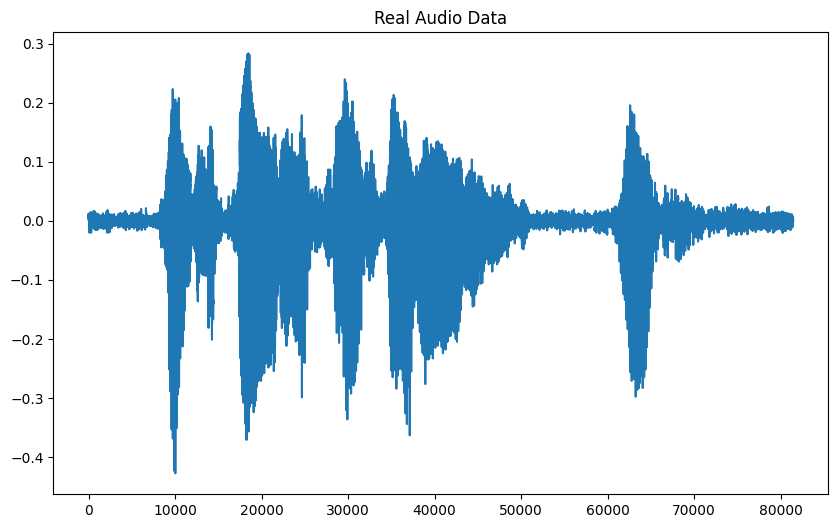

In [11]:
real_ad, real_sr = librosa.load('/content/drive/MyDrive/release_in_the_wild/31764.wav')
plt.figure(figsize=(10, 6))
plt.plot(real_ad)
plt.title("Real Audio Data")
plt.show()

## **`Spectrograms, MelSpectrogram, Chromagram, and MFCC`**

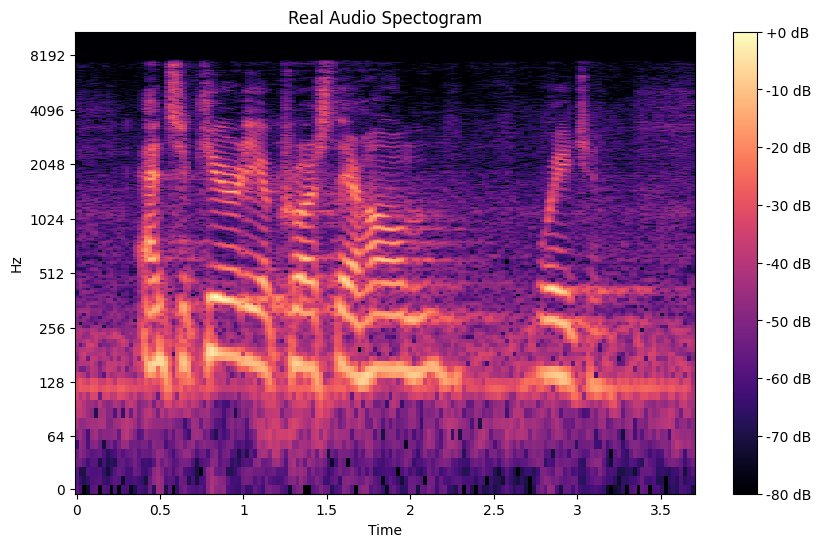

In [12]:
real_spec = np.abs(librosa.stft(real_ad))
real_spec = librosa.amplitude_to_db(real_spec, ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(real_spec, sr=real_sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Real Audio Spectogram")
plt.show()

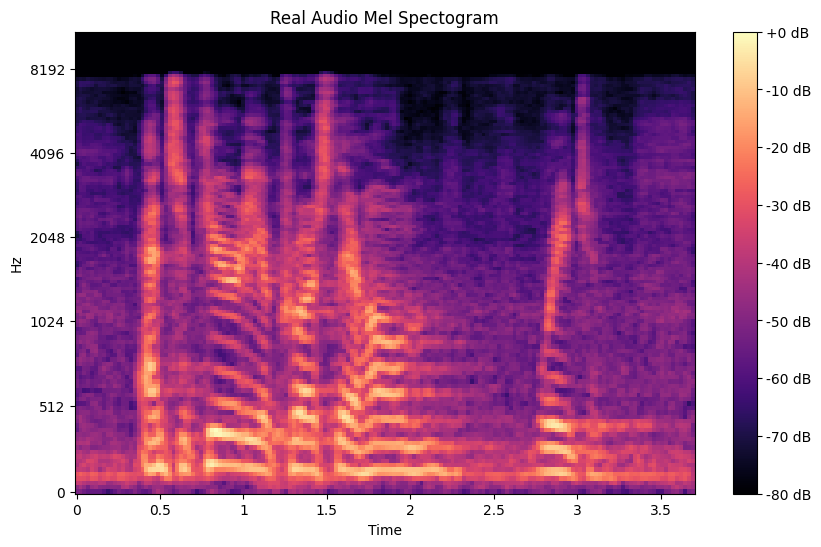

In [13]:
real_mel_spect = librosa.feature.melspectrogram(y=real_ad, sr=real_sr)
real_mel_spect = librosa.power_to_db(real_mel_spect, ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(real_mel_spect, y_axis="mel", x_axis="time")
plt.title("Real Audio Mel Spectogram")
plt.colorbar(format="%+2.0f dB")
plt.show()

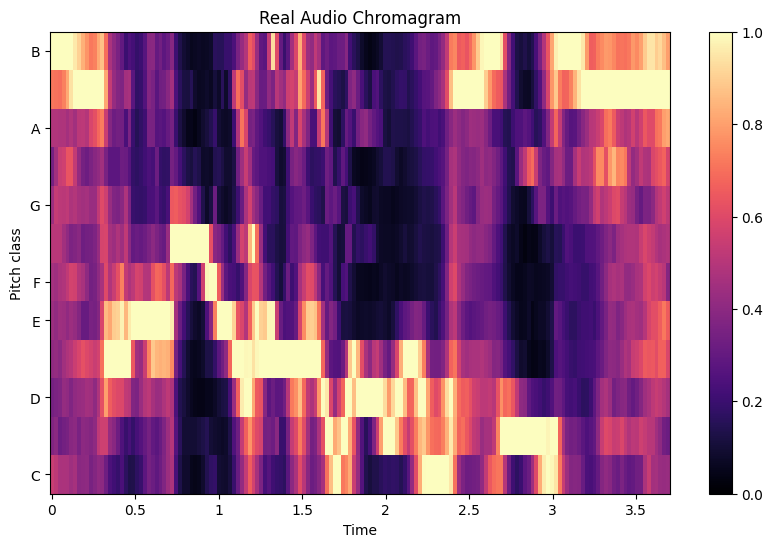

In [14]:
real_chroma = librosa.feature.chroma_cqt(y=real_ad, sr=real_sr, bins_per_octave=36)

plt.figure(figsize=(10, 6))
librosa.display.specshow(real_chroma, sr=real_sr, x_axis="time", y_axis="chroma", vmin=0, vmax=1)
plt.colorbar()
plt.title("Real Audio Chromagram")
plt.show()

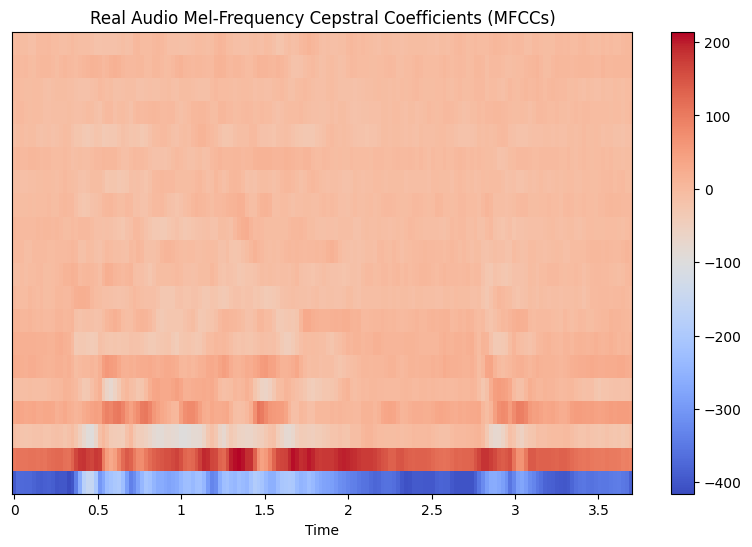

In [15]:
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(10, 6))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

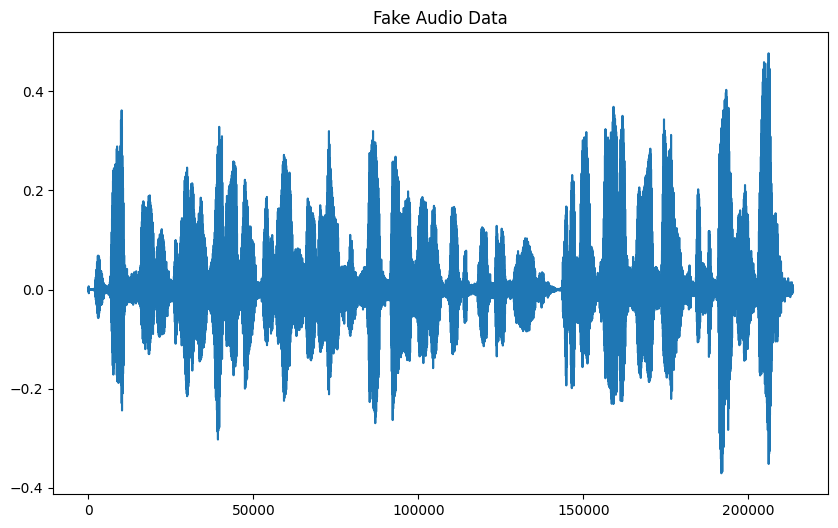

In [16]:
fake_ad, fake_sr = librosa.load('/content/drive/MyDrive/release_in_the_wild/31757.wav')
plt.figure(figsize=(10, 6))
plt.plot(fake_ad)
plt.title("Fake Audio Data")
plt.show()

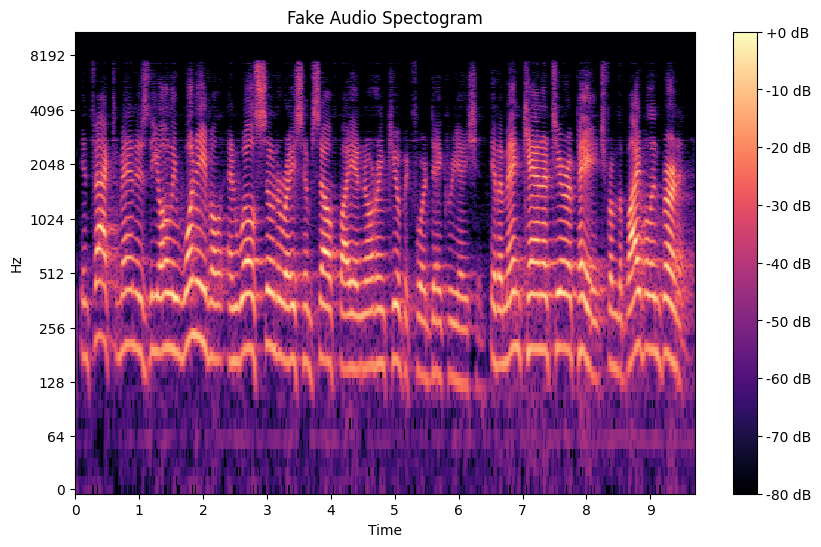

In [17]:
fake_spec = np.abs(librosa.stft(fake_ad))
fake_spec = librosa.amplitude_to_db(fake_spec, ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(fake_spec, sr=fake_sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Fake Audio Spectogram")
plt.show()

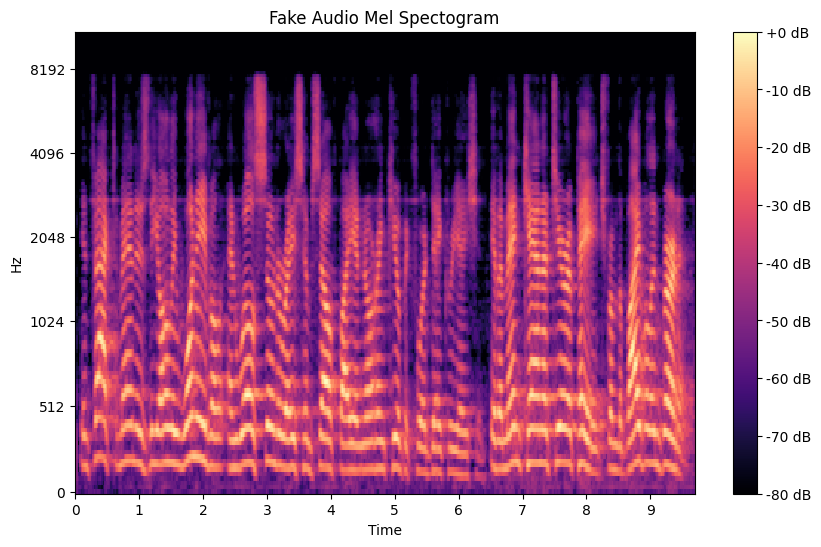

In [18]:
fake_mel_spect = librosa.feature.melspectrogram(y=fake_ad, sr=fake_sr)
fake_mel_spect = librosa.power_to_db(fake_mel_spect, ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(fake_mel_spect, y_axis="mel", x_axis="time")
plt.title("Fake Audio Mel Spectogram")
plt.colorbar(format="%+2.0f dB")
plt.show()

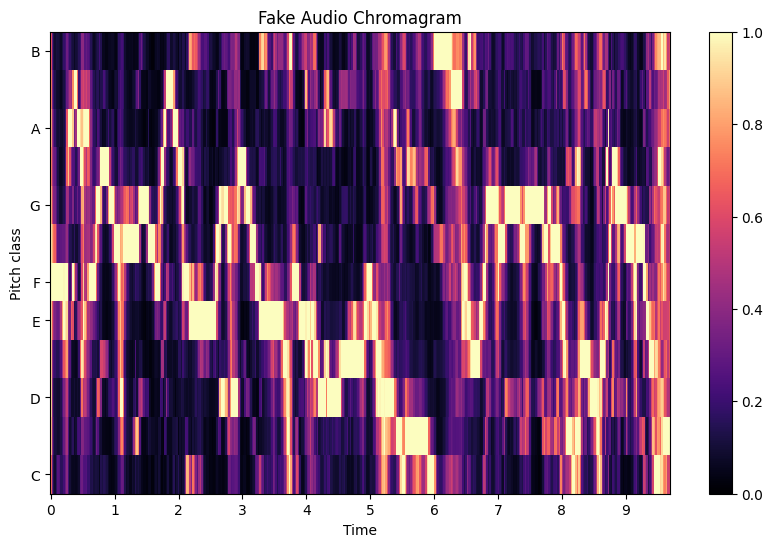

In [19]:
fake_chroma = librosa.feature.chroma_cqt(y=fake_ad, sr=fake_sr, bins_per_octave=36)

plt.figure(figsize=(10,6))
librosa.display.specshow(fake_chroma, sr=fake_sr, x_axis="time", y_axis="chroma", vmin=0, vmax=1)
plt.colorbar()
plt.title("Fake Audio Chromagram")
plt.show()

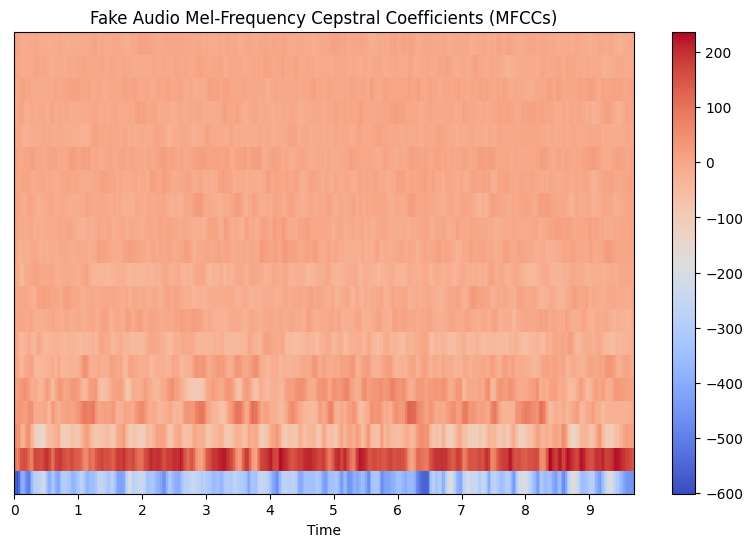

In [20]:
fake_mfccs = librosa.feature.mfcc(y=fake_ad, sr=fake_sr)

plt.figure(figsize=(10, 6))
librosa.display.specshow(fake_mfccs, sr=fake_sr, x_axis="time")
plt.colorbar()
plt.title("Fake Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

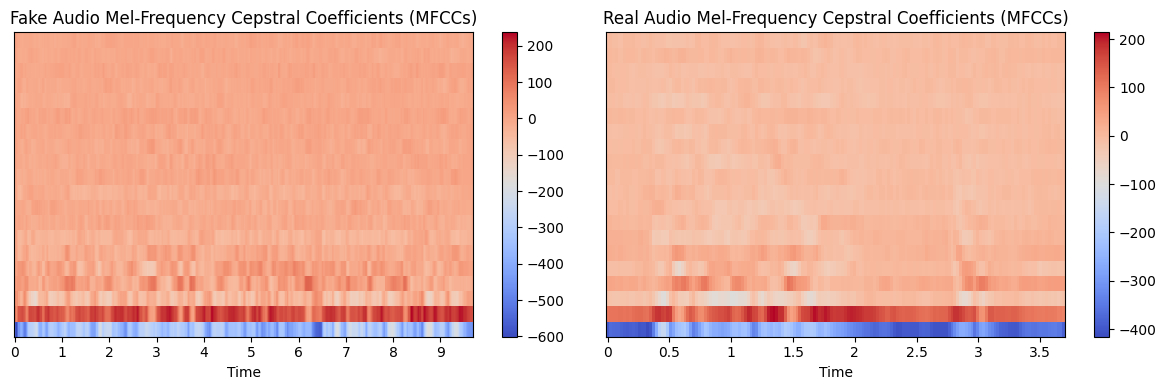

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

librosa.display.specshow(fake_mfccs, sr=fake_sr, x_axis="time")
plt.colorbar()
plt.title("Fake Audio Mel-Frequency Cepstral Coefficients (MFCCs)")

plt.subplot(1,2,2)

librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")

plt.tight_layout()
plt.show()

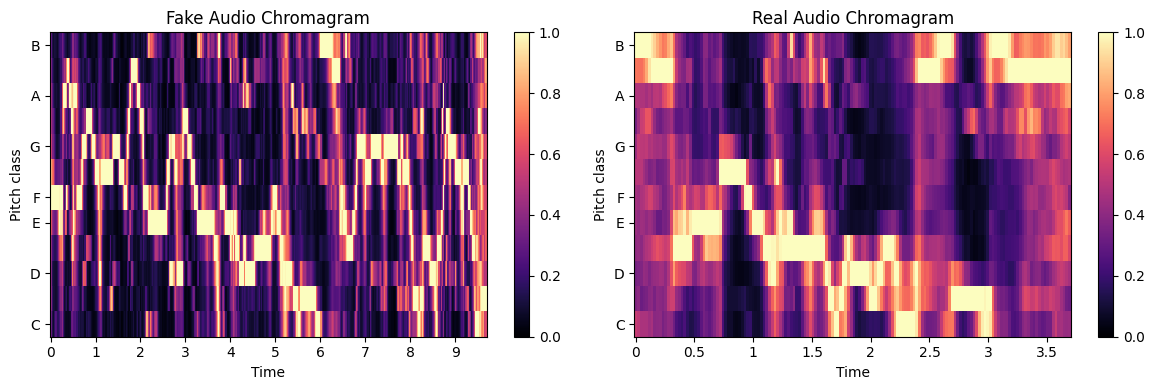

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

librosa.display.specshow(fake_chroma, sr=fake_sr, x_axis="time", y_axis="chroma", vmin=0, vmax=1)
plt.colorbar()
plt.title("Fake Audio Chromagram")

plt.subplot(1,2,2)

librosa.display.specshow(real_chroma, sr=real_sr, x_axis="time", y_axis="chroma", vmin=0, vmax=1)
plt.colorbar()
plt.title("Real Audio Chromagram")

plt.tight_layout()
plt.show()

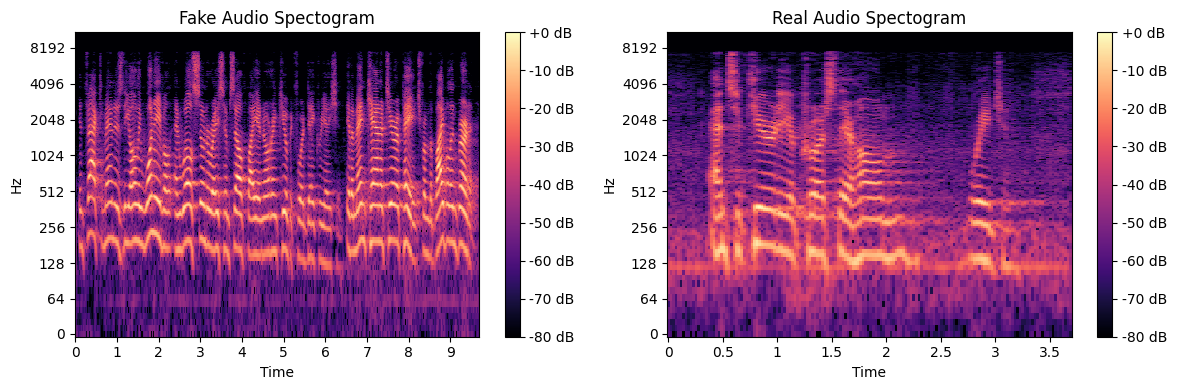

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
librosa.display.specshow(fake_spec, sr=fake_sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Fake Audio Spectogram")

plt.subplot(1,2,2)
librosa.display.specshow(real_spec, sr=real_sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Real Audio Spectogram")

plt.tight_layout()
plt.show()


## **`Feature Extraction and Data Transformation`**

In [24]:
!pip install resampy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.4 MB/s eta 0:00:00


In [25]:
import resampy
import os

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import os
import librosa
import numpy as np
from tqdm import tqdm
import resampy


data = []
labels = []

def process_file(file):
    global data, labels, meta

    if file == 'meta.csv' or file == 'attribution.txt':
        return

    path = '/content/drive/MyDrive/release_in_the_wild' + '/' + file
    audio, sample_rate = librosa.load(path, res_type="kaiser_fast")
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)

    data.append(mfccs_features_scaled)
    target = meta[meta['file'] == file]['label'].iloc[0]
    labels.append(target)

# Using ThreadPoolExecutor to parallelize file processing
with ThreadPoolExecutor() as executor:
    list(tqdm(executor.map(process_file, os.listdir('/content/drive/MyDrive/release_in_the_wild')), total=len(os.listdir('/content/drive/MyDrive/release_in_the_wild'))))


In [ ]:
len(data),len(labels)

(31779, 31779)

In [ ]:
data=np.array(data)
labels=np.array(labels)

In [ ]:
data.shape

(31779, 40)

In [ ]:
data

array([[-4.15523529e+02,  1.10701385e+02, -5.18459778e+01, ...,
         5.52578592e+00,  8.73604965e+00,  5.42261410e+00],
       [-2.80028961e+02,  1.01861305e+02, -3.77172928e+01, ...,
         1.33289051e+00, -1.19511628e+00,  3.29004669e+00],
       [-2.84577606e+02,  1.13987564e+02, -3.81941109e+01, ...,
         2.26009265e-01, -1.64529824e+00,  7.36294687e-01],
       ...,
       [-4.46922028e+02,  1.49841980e+02,  3.25783501e+01, ...,
         3.43428731e+00, -5.98125792e+00, -4.52937508e+00],
       [-3.41105377e+02,  1.27482971e+02, -4.97685051e+01, ...,
         1.13976707e+01,  7.16197968e+00,  1.99716032e+00],
       [-3.65967133e+02,  1.38020767e+02, -2.90384998e+01, ...,
         1.46447611e+00, -1.60734132e-01,  3.22982311e+00]], dtype=float32)

In [ ]:
np.save('/content/drive/MyDrive/audio_features.npy',data)

In [ ]:
np.save('/content/drive/MyDrive/audio_labels.npy',labels)

In [26]:
data=np.load('/content/drive/MyDrive/audio_features.npy')

In [27]:

labels=np.load('/content/drive/MyDrive/audio_labels.npy')

In [28]:
import pandas as pd
features_df = pd.DataFrame({"features": list(data), "class": list(labels)})
features_df.head()

,features,class
0,"[-415.52353, 110.701385, -51.845978, 37.543118...",bona-fide
1,"[-280.02896, 101.861305, -37.717293, 48.255135...",spoof
2,"[-284.5776, 113.987564, -38.19411, 63.279976, ...",bona-fide
3,"[-360.2875, 148.63623, -24.503185, 32.328293, ...",spoof
4,"[-395.4744, 160.8321, -30.066557, 17.098776, 1...",spoof


In [ ]:
features_df['features'][0]

array([-4.15523529e+02,  1.10701385e+02, -5.18459778e+01,  3.75431175e+01,
       -1.33034124e+01,  7.39020395e+00, -3.39562798e+01, -1.02274523e+01,
       -1.43161240e+01, -1.87526474e+01,  5.09312916e+00, -1.84112358e+01,
        8.66361186e-02, -8.50749397e+00,  3.06904674e-01, -2.65519118e+00,
       -1.39559221e+01, -4.53534651e+00, -4.60031176e+00, -5.80575514e+00,
       -7.95805407e+00, -2.79035878e+00, -1.00857067e+01, -7.02913332e+00,
       -1.00801811e+01, -9.02405930e+00, -4.09743214e+00, -5.30489016e+00,
        1.17998227e-01, -3.30986547e+00,  2.56411171e+00, -1.79240331e-01,
        6.54238284e-01,  2.94264483e+00, -2.19927639e-01,  7.62777901e+00,
        4.84924364e+00,  5.52578592e+00,  8.73604965e+00,  5.42261410e+00],
      dtype=float32)

In [ ]:
features_df.shape

(31779, 2)

In [ ]:
features_df['class'].value_counts()

class
bona-fide    19963
spoof        11816
Name: count, dtype: int64

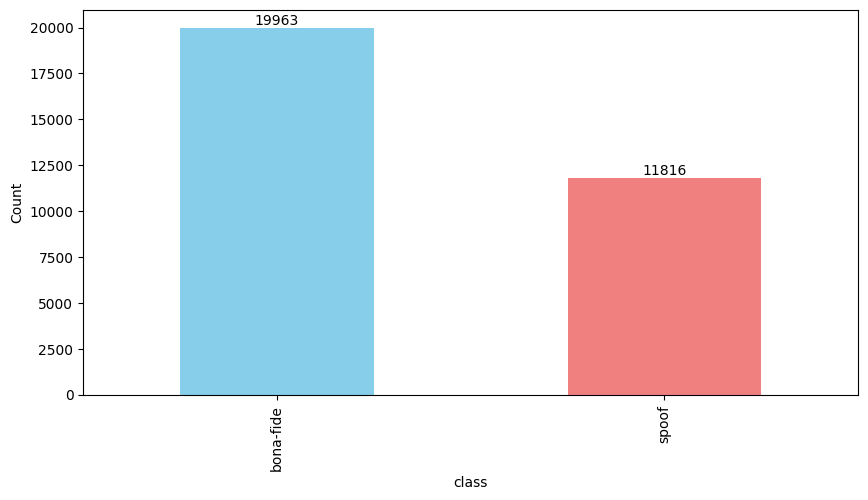

In [ ]:

class_counts = features_df.groupby('class').size()
plt.figure(figsize=(10,5))

ax = class_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

ax.bar_label(ax.containers[0],fontsize=10)
plt.ylabel("Count")

plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [ ]:
features_df["class"] = label_encoder(features_df["class"])

class ['bona-fide' 'spoof']


In [ ]:
features_df['class'].value_counts()

class
0    19963
1    11816
Name: count, dtype: int64

In [ ]:
features_df.head(10)

,features,class
0,"[-415.52353, 110.701385, -51.845978, 37.543118...",0
1,"[-280.02896, 101.861305, -37.717293, 48.255135...",1
2,"[-284.5776, 113.987564, -38.19411, 63.279976, ...",0
3,"[-360.2875, 148.63623, -24.503185, 32.328293, ...",1
4,"[-395.4744, 160.8321, -30.066557, 17.098776, 1...",1
5,"[-309.3347, 141.1535, -14.262313, 48.81545, -9...",0
6,"[-337.81857, 121.02722, -49.876755, 37.556404,...",0
7,"[-267.7307, 161.85149, 1.0439937, 20.60957, -5...",0
8,"[-380.6454, 121.173386, -26.65018, 19.842487, ...",1
9,"[-378.6678, 105.869995, -31.219223, 41.18057, ...",0


In [ ]:
X = np.array(features_df["features"].tolist())
y = np.array(features_df["class"].tolist())

In [ ]:
X.shape,y.shape

((31779, 40), (31779,))

## **`Audio Sampling and Preparing Train/Test Data`**



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [ ]:
#ros = RandomOverSampler(random_state=42)
#X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
#from tensorflow.keras.utils import to_categorical
#y_resampled = to_categorical(y_resampled)

In [ ]:
#X_resampled.shape,y_resampled.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
num_labels = len(features_df["class"].unique())
num_labels

2

In [ ]:

input_shape = features_df["features"][0].shape
input_shape

(40,)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((25423, 40), (25423,), (6356, 40), (6356,))

<h2 style="font-size: 20px; font-weight: bold;"><strong>Final Research Problem Assessment</h2></strong>

<p style="margin-bottom: 20px;">In this section, we assess the final research problem of detecting deepfake audio and its implications. This assessment encompasses the following key points:</p>

<h3 style="font-size: 18px; font-weight: bold;">Scope of the Problem</h3>

<p style="margin-bottom: 20px;">Deepfake voice recognition is a relatively novel and emerging area, especially given the rising concerns about deepfake technology. The scope of the problem involves developing and implementing machine learning algorithms capable of accurately detecting and distinguishing between real and deepfake voices.</p>

<h3 style="font-size: 18px; font-weight: bold;">Dataset Quality and Impact</h3>

<p style="margin-bottom: 20px;">The dataset provided by Fraunhofer AISEC is of high quality, comprising 38 hours of bonafide and spoof audio from various sources, including public figures and politicians. Its association with a reputable security research organization enhances its credibility and reliability, thereby impacting the research positively.</p>

<h3 style="font-size: 18px; font-weight: bold;">Implications and Opportunities</h3>

<p style="margin-bottom: 20px;">A successful deepfake voice recognition system could have broad implications, including in media forensics, cybersecurity, and content moderation. Additionally, the completion of the project can potentially elevate expertise in machine learning and audio forensics, paving the way for career growth opportunities in AI research and related fields.</p>

<h2 style="font-size: 20px; font-weight: bold;">Final Research Questions</h2>

<p style="margin-bottom: 20px;">Based on our assessment, the following research questions guide our project:</p>

<li> Which audio features exhibit the highest discriminatory power between real and deepfake voices? How do different feature extraction methods and preprocessing techniques affect the robustness of the model?</li>
    
<li>  How can class imbalance in the dataset, particularly the scarcity of deepfake voice samples, be effectively addressed to prevent biased model training? What are the most suitable strategies for oversampling or undersampling in this context?</li>

    
<li>To what extent does the trained model generalize to unseen deepfake voices from different speakers or audio sources? Can transfer learning techniques be leveraged to improve model performance and adaptability across diverse datasets?</li>
    
<li>How can the model be optimized for real-time detection of deepfake voices in streaming audio or video content?</li>
    
<li>What are the practical challenges and considerations for deploying deepfake voice detection systems in real-world applications, such as media authentication or fraud detection? How can ethical concerns surrounding privacy, consent, and potential misuse of the technology be addressed in the deployment phase?</li>




<h2 style="font-size: 20px; font-weight: bold;"> <b> Model Building </b></h2>

<p style="margin-bottom: 20px;">In this section, we develop and evaluate machine learning models for deepfake audio detection. The process involves the following steps:</p>

<h3 style="font-size: 18px; font-weight: bold;">Type of Task and Problem</h3>

<p style="margin-bottom: 20px;">The type of task is supervised learning, and the problem is classification, where we aim to classify audio as real or deepfake.</p>

<h3 style="font-size: 18px; font-weight: bold;">Traditional Algorithms Used</h3>

<p style="margin-bottom: 20px;">We explore the following traditional machine learning algorithms:</p>

<ul style="margin-bottom: 20px;">
    <li><strong>Naive Bayes Classifier:</strong> Efficient with high-dimensional data like audio features.</li>
    <li><strong>K-Nearest Neighbor (KNN) Classifier:</strong> Effective for classification tasks with irregular decision boundaries.</li>
    <li><strong>Decision Tree Classifier:</strong> Intuitive and easy to interpret, suitable for both numerical and categorical data.</li>
</ul>

<h3 style="font-size: 18px; font-weight: bold;">Results Assessment and Performance Evaluation</h3>

<p style="margin-bottom: 20px;">We evaluate the models based on the following metrics:</p>

<ul style="margin-bottom: 20px;">
    <li><strong>Accuracy:</strong> Proportion of correct predictions.</li>
    <li><strong>Precision:</strong> Ability to correctly identify positive cases.</li>
    <li><strong>Recall:</strong> Ability to capture instances of positive cases.</li>
    <li><strong>F1-Score:</strong> Balance between precision and recall.</li>
</ul>

<p style="margin-bottom: 20px;">Based on the provided metrics, we determine the best performing model for our dataset.</p>

<h3 style="font-size: 18px; font-weight: bold;">Next Steps</h3>

<p style="margin-bottom: 20px;">Following the evaluation, our next steps include:</p>

<ul style="margin-bottom: 20px;">
    <li>Exploring deep learning models such as Convolutional Neural Networks (CNN), Gated Recurrent Unit (GRU), and Long Short-Term Memory (LSTM) networks.</li>
    <li>Hyperparameter tuning and performance evaluation of deep learning models.</li>
    <li>Comparing the performance of deep learning models with traditional machine learning algorithms.</li>
</ul>


# **`Decision Tree Classifier`**

Iteration 1: Train Accuracy: 1.0, Test Accuracy: 0.7658904971680303
Iteration 2: Train Accuracy: 1.0, Test Accuracy: 0.7666771554436753
Iteration 3: Train Accuracy: 1.0, Test Accuracy: 0.7663624921334172
Iteration 4: Train Accuracy: 1.0, Test Accuracy: 0.7679358086847073
Iteration 5: Train Accuracy: 1.0, Test Accuracy: 0.7699811202013845
Iteration 6: Train Accuracy: 1.0, Test Accuracy: 0.7713971050975457
Iteration 7: Train Accuracy: 1.0, Test Accuracy: 0.76431718061674
Iteration 8: Train Accuracy: 1.0, Test Accuracy: 0.7668344870988043
Iteration 9: Train Accuracy: 1.0, Test Accuracy: 0.7693517935808685
Iteration 10: Train Accuracy: 1.0, Test Accuracy: 0.7712397734424166
Iteration 11: Train Accuracy: 1.0, Test Accuracy: 0.7682504719949654
Iteration 12: Train Accuracy: 1.0, Test Accuracy: 0.7655758338577722
Iteration 13: Train Accuracy: 1.0, Test Accuracy: 0.7698237885462555
Iteration 14: Train Accuracy: 1.0, Test Accuracy: 0.7658904971680303
Iteration 15: Train Accuracy: 1.0, Test Accur

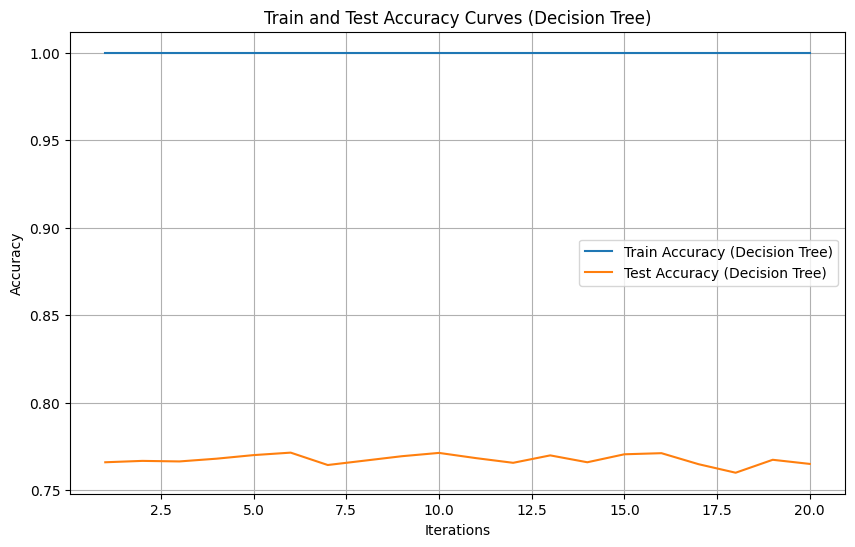

Final Train Accuracy (Decision Tree): 1.0
Final Test Accuracy (Decision Tree): 0.7649465072372561
Classification Report - Train Data (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15984
           1       1.00      1.00      1.00      9439

    accuracy                           1.00     25423
   macro avg       1.00      1.00      1.00     25423
weighted avg       1.00      1.00      1.00     25423


Classification Report - Test Data (Decision Tree):
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      3979
           1       0.68      0.70      0.69      2377

    accuracy                           0.76      6356
   macro avg       0.75      0.75      0.75      6356
weighted avg       0.77      0.76      0.77      6356



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Initialize lists to store train and test accuracies
train_accuracies_dt = []
test_accuracies_dt = []

# Train the classifier and record train and test accuracies for 20 iterations
for i in range(1, 21):  # 20 iterations
    dt_classifier.fit(X_train, y_train)
    train_accuracy = dt_classifier.score(X_train, y_train)
    test_accuracy = dt_classifier.score(X_test, y_test)
    train_accuracies_dt.append(train_accuracy)
    test_accuracies_dt.append(test_accuracy)

    print(f"Iteration {i}: Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")


# Plot train and test accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracies_dt, label='Train Accuracy (Decision Tree)')
plt.plot(range(1, 21), test_accuracies_dt, label='Test Accuracy (Decision Tree)')
plt.title('Train and Test Accuracy Curves (Decision Tree)')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Final Evaluation
# Predictions
y_pred_train_dt = dt_classifier.predict(X_train)
y_pred_test_dt = dt_classifier.predict(X_test)

# Calculate accuracy
train_accuracy_dt = dt_classifier.score(X_train, y_train)
test_accuracy_dt = dt_classifier.score(X_test, y_test)

# Print accuracies
print("Final Train Accuracy (Decision Tree):", train_accuracy_dt)
print("Final Test Accuracy (Decision Tree):", test_accuracy_dt)

# Generate classification reports
print("Classification Report - Train Data (Decision Tree):")
print(classification_report(y_train, y_pred_train_dt))

print("\nClassification Report - Test Data (Decision Tree):")
print(classification_report(y_test, y_pred_test_dt))


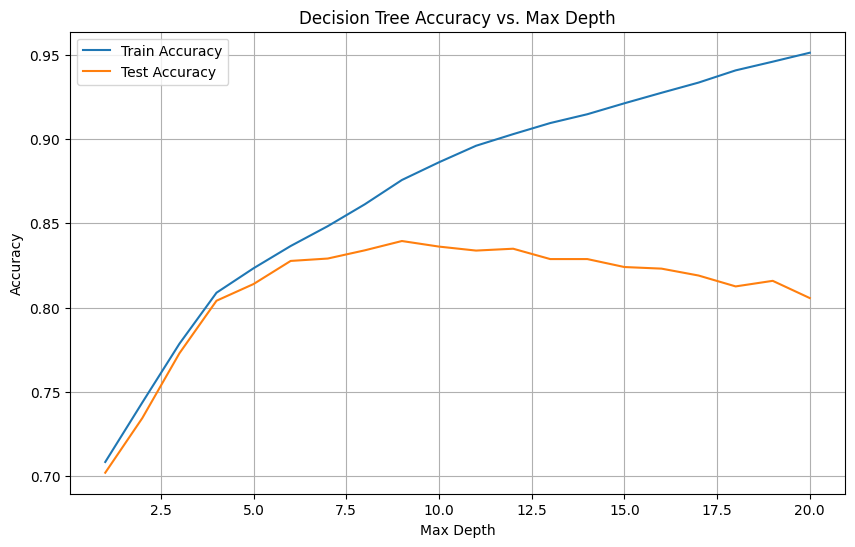

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Define a range of hyperparameters to explore (for example, max_depth)
hyperparameters = range(1, 21)  # Example range of max_depth from 1 to 20

# Iterate over the hyperparameters
for depth in hyperparameters:
    # Initialize the Decision Tree classifier with the current hyperparameter
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Predict the labels for the training and test data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the training and test accuracies
plt.figure(figsize=(10, 6))
plt.plot(hyperparameters, train_accuracies, label='Train Accuracy')
plt.plot(hyperparameters, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Find the index of the maximum test accuracy
max_test_accuracy_index = test_accuracies.index(max(test_accuracies))

# Corresponding optimal max depth
optimal_max_depth = hyperparameters[max_test_accuracy_index]

print("Optimal Max Depth:", optimal_max_depth)


Optimal Max Depth: 9


In [ ]:
# Initialize the Decision Tree classifier with the optimal max depth
optimal_clf = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)

# Train the classifier on the full training data
optimal_clf.fit(X_train, y_train)

# Predict the labels for the training and test data
y_train_pred = optimal_clf.predict(X_train)
y_test_pred = optimal_clf.predict(X_test)

# Calculate training and test accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy with optimal max depth:", train_accuracy)
print("Test Accuracy with optimal max depth:", test_accuracy)


Training Accuracy with optimal max depth: 0.8757031034889667
Test Accuracy with optimal max depth: 0.8395217117684078


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for the test data
report = classification_report(y_test, y_test_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      3979
           1       0.80      0.76      0.78      2377

    accuracy                           0.84      6356
   macro avg       0.83      0.82      0.83      6356
weighted avg       0.84      0.84      0.84      6356



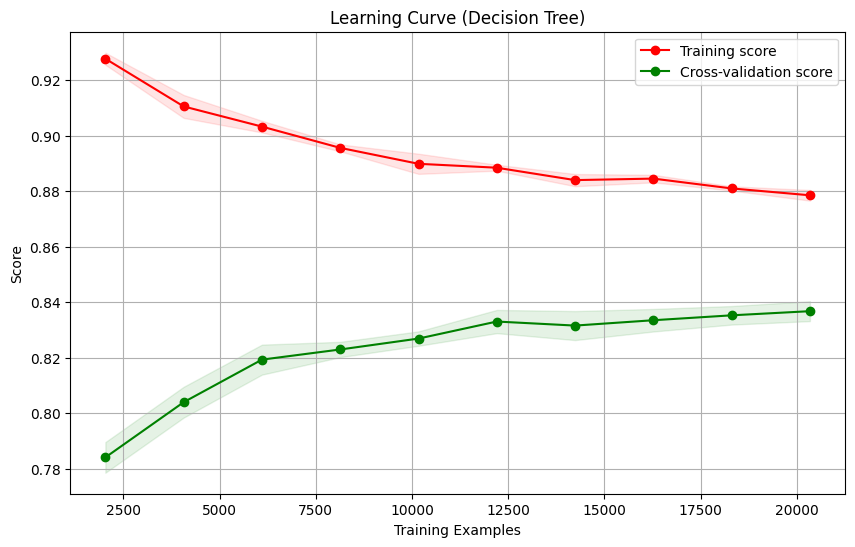

In [ ]:
from sklearn.model_selection import learning_curve

# Define the decision tree classifier with optimal max depth
optimal_dt_classifier = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)

# Calculate learning curves
train_sizes, train_scores, valid_scores = learning_curve(
    optimal_dt_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


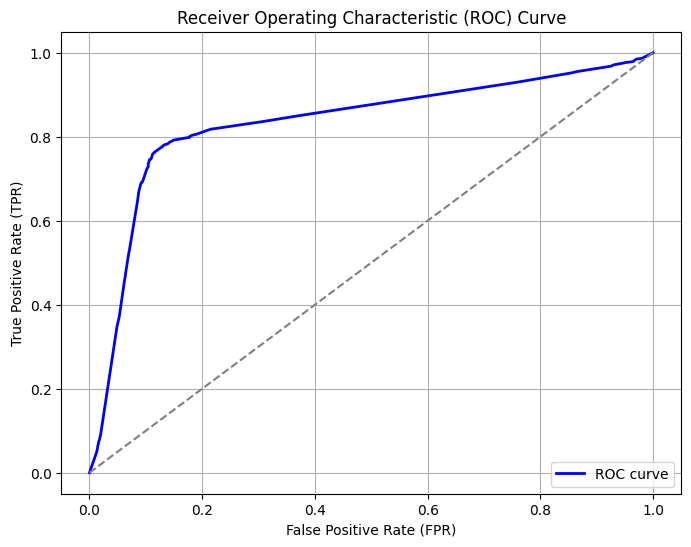

Area Under the ROC Curve (AUC): 0.8324833372682392


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Train the decision tree classifier
optimal_dt_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class (class 1) on the test data
y_probs = optimal_dt_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate the area under the ROC curve (AUC)
auc_score = roc_auc_score(y_test, y_probs)
print("Area Under the ROC Curve (AUC):", auc_score)


It has high True positives, indicating model fitted well


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings

# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Define the parameter grid
param_grid = {
    'max_depth': range(1, 21),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)


Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy Score: 0.772817394053595


In [ ]:
print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best F1 Score: 0.772817394053595


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier with best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, max_depth=9, min_samples_leaf=1, min_samples_split=5)

# Train the model on the entire training dataset
best_clf.fit(X_train, y_train)

# Alternatively, if you have separate training and validation sets:
# best_clf.fit(X_train, y_train)

# Make predictions on the test set (or validation set)
y_pred = best_clf.predict(X_test)

# Evaluate the model's performance using appropriate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8387350534927628
Precision: 0.8004444444444444
Recall: 0.7576777450567943
F1 Score: 0.7784741733304518


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      3979
           1       0.80      0.76      0.78      2377

    accuracy                           0.84      6356
   macro avg       0.83      0.82      0.83      6356
weighted avg       0.84      0.84      0.84      6356

Confusion Matrix:
[[3530  449]
 [ 576 1801]]


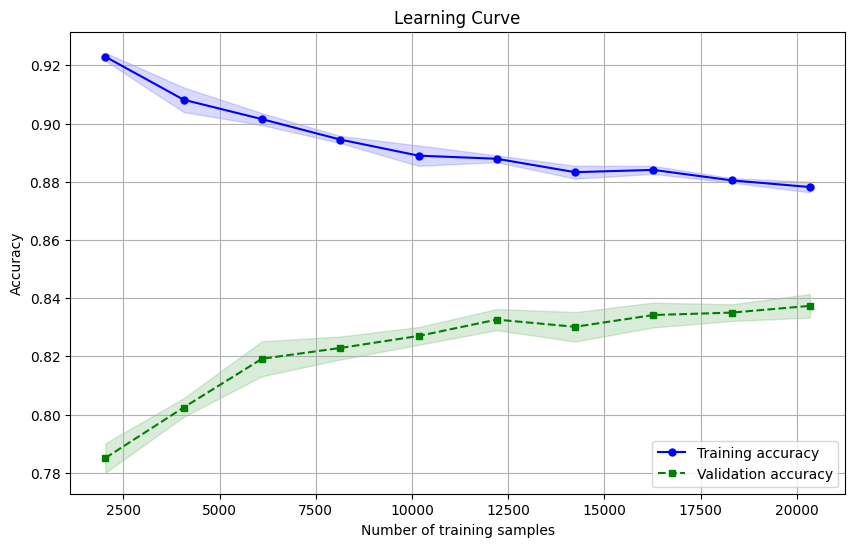

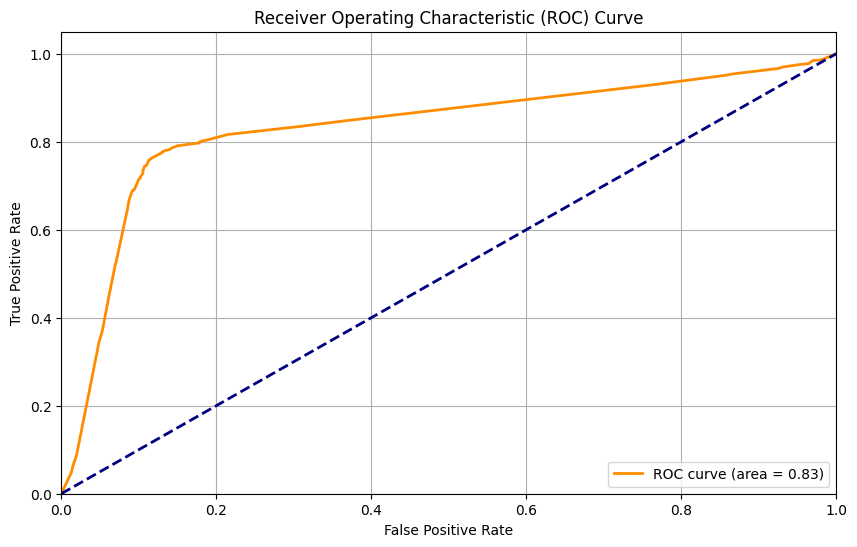

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(best_clf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('Learning Curve')
plt.show()

# Generate ROC curve
y_scores = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model on the entire training dataset
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_clf.predict(X_test)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate metrics for training set
y_train_pred = best_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Print metrics
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)
print()
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)


Train Accuracy: 0.8751917554969909
Train Precision: 0.8548935206162211
Train Recall: 0.7995550376099163
Train F1 Score: 0.8262987901680626

Test Accuracy: 0.8387350534927628
Test Precision: 0.8004444444444444
Test Recall: 0.7576777450567943
Test F1 Score: 0.7784741733304518


# **`Naive Bayes Classifier`**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Assuming X contains your audio features and y contains corresponding labels
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8267778477029578
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3979
           1       0.80      0.71      0.76      2377

    accuracy                           0.83      6356
   macro avg       0.82      0.80      0.81      6356
weighted avg       0.83      0.83      0.82      6356



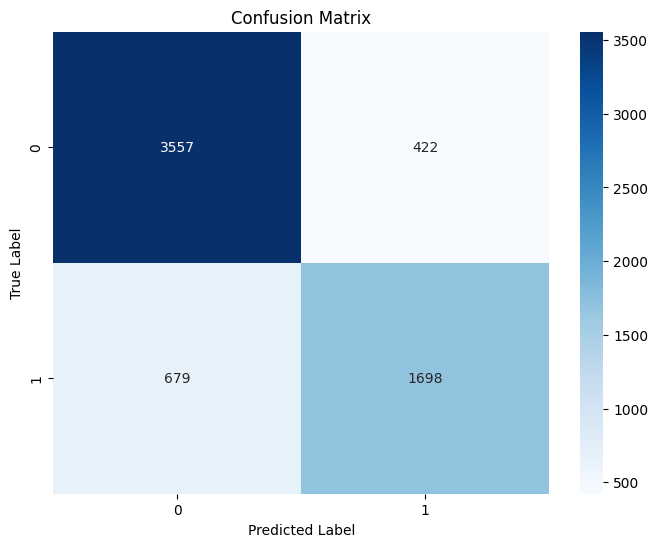

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


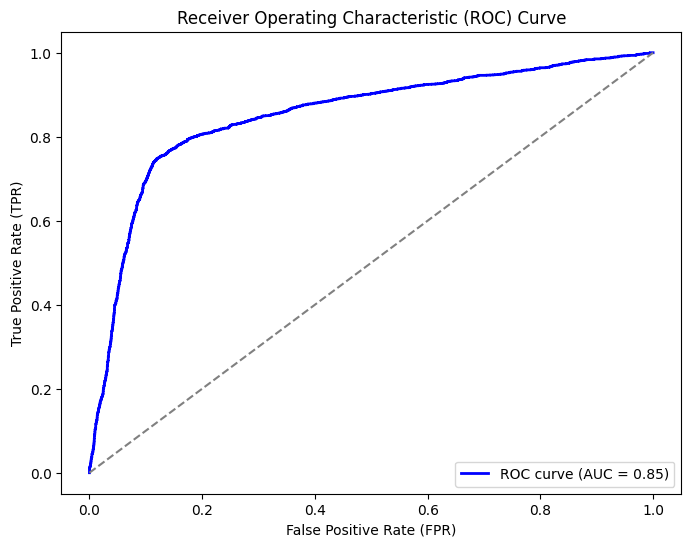

In [ ]:
from sklearn.metrics import roc_curve, auc
y_probs = nb_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

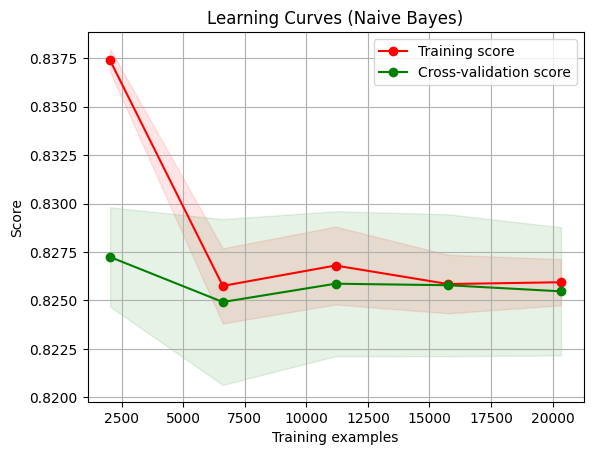

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Naive Bayes)"
plot_learning_curve(nb_classifier, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


# **`K-Nearest Neighbors`**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8733480176211453
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3979
           1       0.84      0.82      0.83      2377

    accuracy                           0.87      6356
   macro avg       0.87      0.86      0.86      6356
weighted avg       0.87      0.87      0.87      6356



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)}  # Range of values for k

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameter (k) and its corresponding score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print("Best k:", best_k)
print("Best Cross-Validated Accuracy:", best_score)


Best k: 9
Best Cross-Validated Accuracy: 0.8753490658800394


In [ ]:
# Initialize the KNN classifier with the best value of k
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Train the classifier on the entire training data
best_knn_classifier.fit(X_train, y_train)

# Evaluate the classifier on the test data
test_accuracy = best_knn_classifier.score(X_test, y_test)

print("Test Accuracy with Best k:", test_accuracy)


Test Accuracy with Best k: 0.8780679672750157


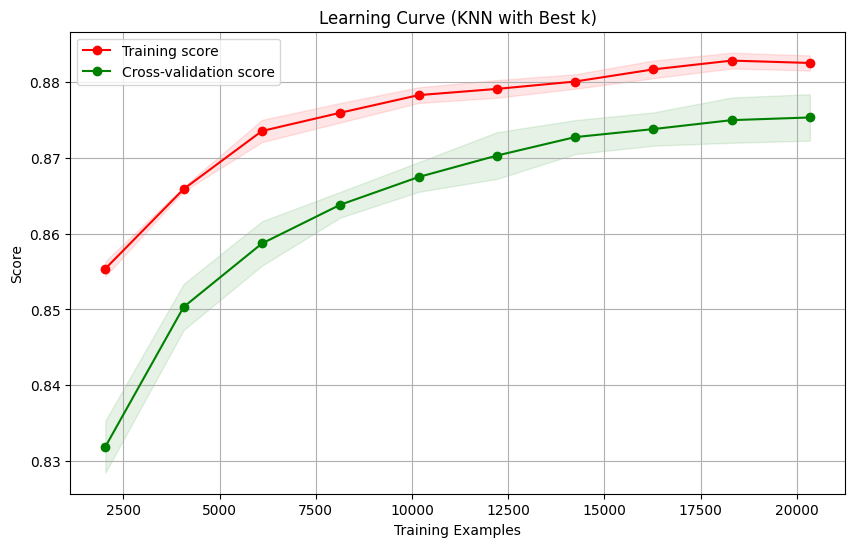

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Initialize the KNN classifier with the best value of k
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Calculate learning curves
train_sizes, train_scores, valid_scores = learning_curve(
    best_knn_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (KNN with Best k)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()


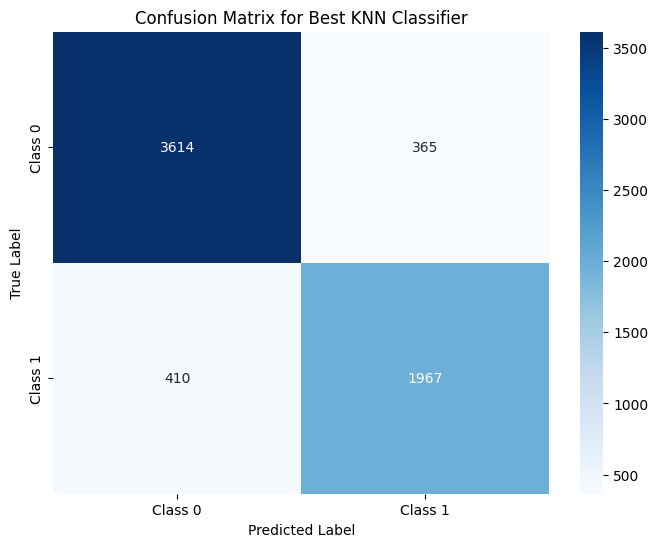

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fit the KNN classifier with the best value of k
best_knn_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = best_knn_classifier.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Best KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


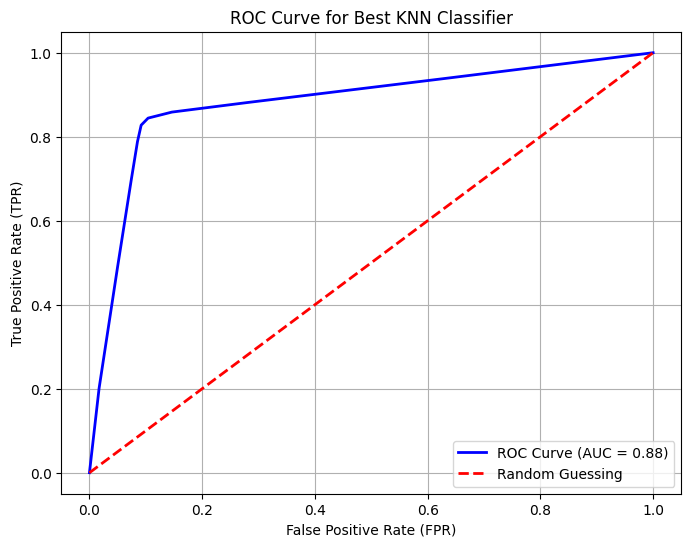

In [ ]:
from sklearn.metrics import roc_curve, auc

# Fit the KNN classifier with the best value of k
best_knn_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = best_knn_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Best KNN Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# **`Random Forest`**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier with best hyperparameters from decision tree
rf_clf = RandomForestClassifier(random_state=42,
                                max_depth=9,
                                min_samples_leaf=1,
                                min_samples_split=5)

# Train Random Forest classifier
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_clf.predict(X_test)

# Calculate metrics for test set
rf_test_accuracy = accuracy_score(y_test, rf_y_pred)
rf_test_precision = precision_score(y_test, rf_y_pred)
rf_test_recall = recall_score(y_test, rf_y_pred)
rf_test_f1 = f1_score(y_test, rf_y_pred)

# Print metrics for Random Forest classifier
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("Random Forest Test Precision:", rf_test_precision)
print("Random Forest Test Recall:", rf_test_recall)
print("Random Forest Test F1 Score:", rf_test_f1)


Random Forest Test Accuracy: 0.8713027061044682
Random Forest Test Precision: 0.8548020027309968
Random Forest Test Recall: 0.790071518721077
Random Forest Test F1 Score: 0.8211630957586358


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the train set
rf_train_y_pred = rf_clf.predict(X_train)

# Calculate metrics for train set
rf_train_accuracy = accuracy_score(y_train, rf_train_y_pred)
rf_train_precision = precision_score(y_train, rf_train_y_pred)
rf_train_recall = recall_score(y_train, rf_train_y_pred)
rf_train_f1 = f1_score(y_train, rf_train_y_pred)

# Print metrics for Random Forest classifier on train set
print("Random Forest Train Accuracy:", rf_train_accuracy)
print("Random Forest Train Precision:", rf_train_precision)
print("Random Forest Train Recall:", rf_train_recall)
print("Random Forest Train F1 Score:", rf_train_f1)
print()

# Print metrics for Random Forest classifier on test set
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("Random Forest Test Precision:", rf_test_precision)
print("Random Forest Test Recall:", rf_test_recall)
print("Random Forest Test F1 Score:", rf_test_f1)


Random Forest Train Accuracy: 0.8860480667112457
Random Forest Train Precision: 0.8738285714285714
Random Forest Train Recall: 0.8100434368047462
Random Forest Train F1 Score: 0.8407279124745726

Random Forest Test Accuracy: 0.8713027061044682
Random Forest Test Precision: 0.8548020027309968
Random Forest Test Recall: 0.790071518721077
Random Forest Test F1 Score: 0.8211630957586358


# **Hyperparameter tuning for Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter distributions for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [10,25,50],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node

}

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the Random Forest classifier and parameter distributions
random_search_rf = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the data
random_search_rf.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
print("Best Accuracy Score for Random Forest:", best_score_rf)


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 50}
Best Accuracy Score for Random Forest: 0.880226364239092


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest classifier with the best parameters found
best_rf_clf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                     max_depth=best_params_rf['max_depth'],
                                     min_samples_split=best_params_rf['min_samples_split'],
                                     min_samples_leaf=best_params_rf['min_samples_leaf'],
                                     random_state=42)

# Train the Random Forest classifier on the training data
best_rf_clf.fit(X_train, y_train)

# Predict labels for train and test data
y_train_pred = best_rf_clf.predict(X_train)
y_test_pred = best_rf_clf.predict(X_test)

# Calculate accuracy for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision for train and test data
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

# Calculate recall for train and test data
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Calculate F1-score for train and test data
train_f1_score = f1_score(y_train, y_train_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Print the metrics
print("Metrics for optimized Random Forest Model")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print("Train F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)


Metrics for optimized Random Forest Model
Train Accuracy: 0.9277425952877316
Test Accuracy: 0.882473253618628
Train Precision: 0.9238403211418377
Test Precision: 0.8577699736611062
Train Recall: 0.8777412861531942
Test Recall: 0.8220445940260833
Train F1 Score: 0.9002010104851416
Test F1 Score: 0.8395273899033298


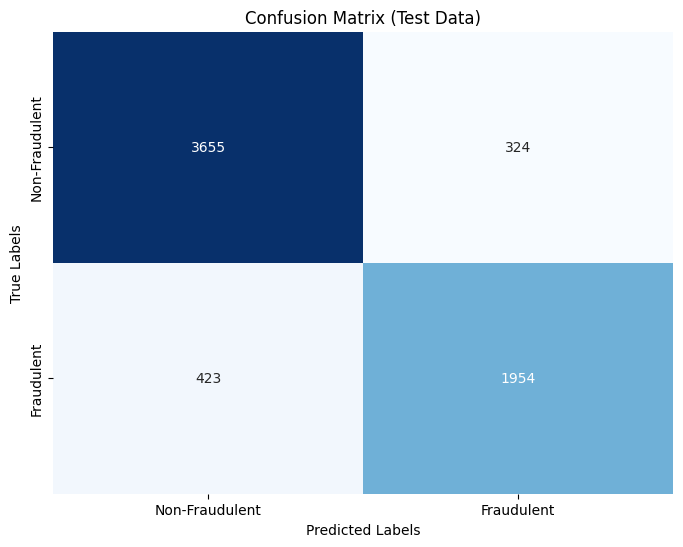

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for test data
class_report_test = classification_report(y_test, y_test_pred, target_names=['Non-Fraudulent', 'Fraudulent'])

# Print classification report
print("Classification Report (Test Data):\n", class_report_test)


Classification Report (Test Data):
                 precision    recall  f1-score   support

Non-Fraudulent       0.90      0.92      0.91      3979
    Fraudulent       0.86      0.82      0.84      2377

      accuracy                           0.88      6356
     macro avg       0.88      0.87      0.87      6356
  weighted avg       0.88      0.88      0.88      6356



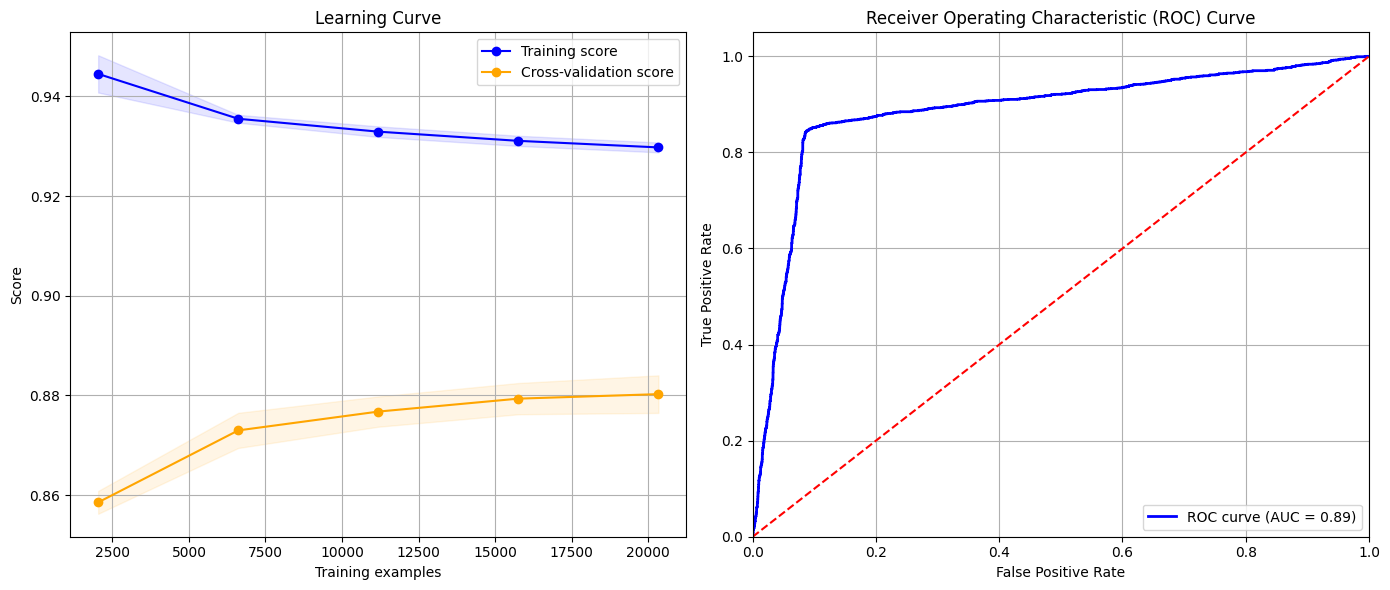

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_rf_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)

# Plot ROC curve
plt.subplot(1, 2, 2)
# Get predicted probabilities for positive class
y_test_probs = best_rf_clf.predict_proba(X_test)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.tight_layout()
plt.show()


# **XGBoost Classifier**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train the XGBoost classifier on the training data
xgb_clf.fit(X_train, y_train)

# Predict labels for train and test data
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


Train Accuracy: 0.9433977107343744
Train Precision: 0.934593654932638
Train Recall: 0.9113253522618922
Train F1 Score: 0.9228128520087968

Test Accuracy: 0.8760226557583386
Test Precision: 0.8452846588439809
Test Recall: 0.8182583087925958
Test F1 Score: 0.8315519452757588


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter grid for XGBoost
param_dist = {
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [50, 100, 150, 200]
}

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Initialize RandomizedSearchCV with XGBoost classifier and parameter grid
random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Perform randomized search on the data
random_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters for XGBoost:", best_params)
print("Best Accuracy Score for XGBoost:", best_score)


Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best Accuracy Score for XGBoost: 0.881091863188115


In [ ]:
import xgboost as xgb

# Initialize XGBoost classifier with best parameters
best_params = {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
best_xgb_clf = xgb.XGBClassifier(**best_params)

# Train the XGBoost classifier on the training data
best_xgb_clf.fit(X_train, y_train)

# Predict labels for train and test data
y_train_pred = best_xgb_clf.predict(X_train)
y_test_pred = best_xgb_clf.predict(X_test)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


Train Accuracy: 0.9756126342288479
Train Precision: 0.9752128462118763
Train Recall: 0.9586820637779426
Train F1 Score: 0.9668768030772518

Test Accuracy: 0.8834172435494021
Test Precision: 0.8550347222222222
Test Recall: 0.8287757677745057
Test F1 Score: 0.8417004913480026


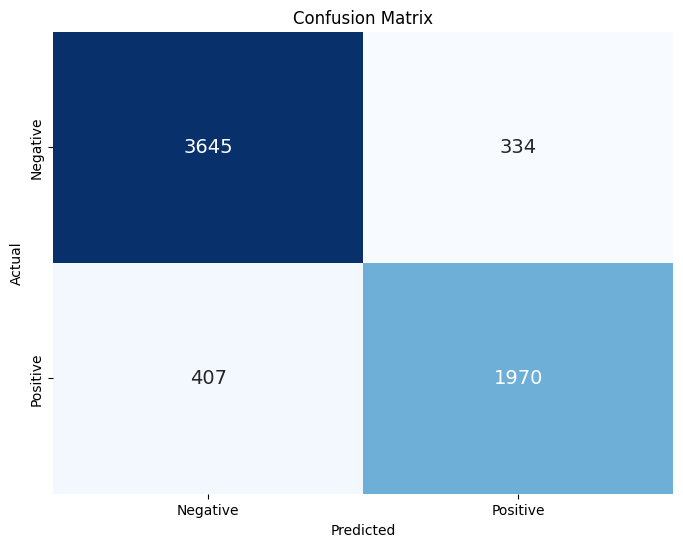

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for test data
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14},
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


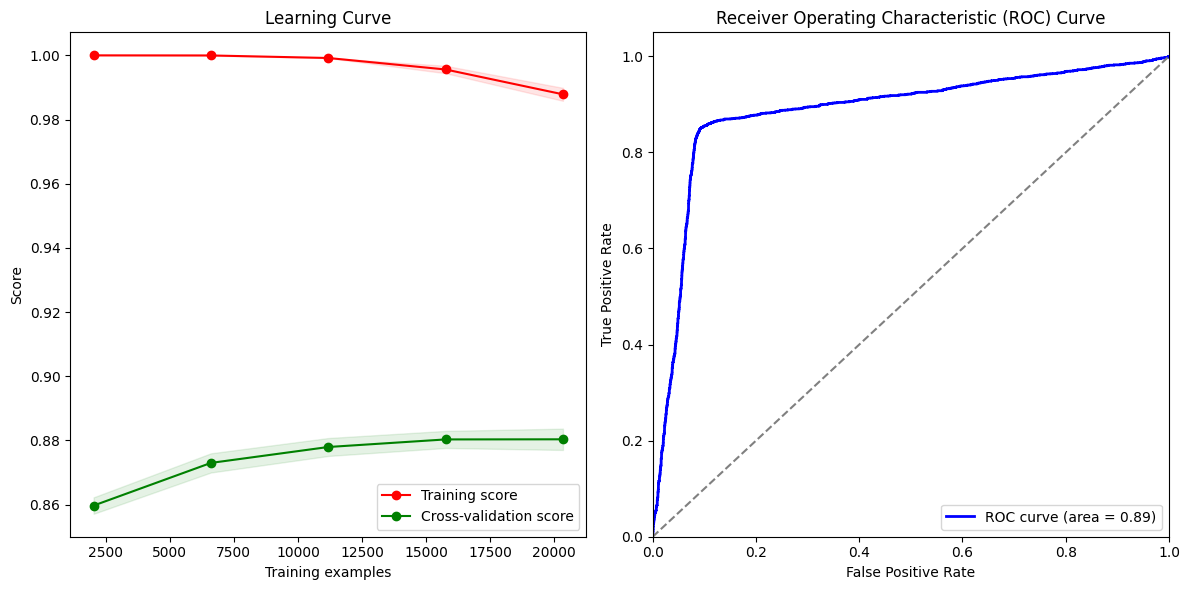

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc

# Plot learning curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

train_sizes, train_scores, test_scores = learning_curve(best_xgb_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")

# Compute ROC curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, best_xgb_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


# **Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize base classifiers (Random Forest and KNN)
rf_classifier = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                     max_depth=best_params_rf['max_depth'],
                                     min_samples_split=best_params_rf['min_samples_split'],
                                     min_samples_leaf=best_params_rf['min_samples_leaf'],
                                     random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=9)

# Initialize Voting Classifier with estimators
voting_clf = VotingClassifier(estimators=[('rf', rf_classifier), ('knn', knn_classifier)], voting='hard')

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict labels for train and test data
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.9093340675766038
Test Accuracy: 0.8750786658275646


In [ ]:
from sklearn.metrics import classification_report

# Compute classification report for train data
train_classification_report = classification_report(y_train, y_train_pred)

# Compute classification report for test data
test_classification_report = classification_report(y_test, y_test_pred)

print("Classification Report for Train Data:\n", train_classification_report)
print("\nClassification Report for Test Data:\n", test_classification_report)


Classification Report for Train Data:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     15984
           1       0.92      0.83      0.87      9439

    accuracy                           0.91     25423
   macro avg       0.91      0.89      0.90     25423
weighted avg       0.91      0.91      0.91     25423


Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      3979
           1       0.86      0.80      0.83      2377

    accuracy                           0.88      6356
   macro avg       0.87      0.86      0.86      6356
weighted avg       0.87      0.88      0.87      6356



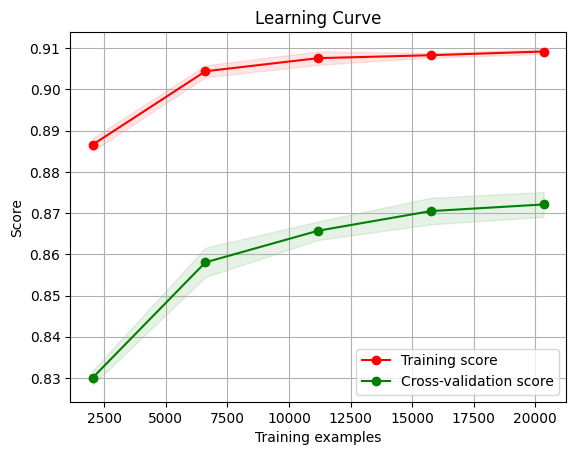

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Voting Classifier
plot_learning_curve(voting_clf, X_train, y_train, cv=5)
plt.show()


# **Stacking Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize base classifiers (Random Forest and KNN)
rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()

# Initialize Stacking Classifier with base classifiers and meta-classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_classifier), ('knn', knn_classifier)],
    final_estimator=LogisticRegression(),cv=5
)

# Train Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predict labels for train and test data
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.9933918105652362
Test Accuracy: 0.8843612334801763


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize base classifiers (Random Forest, KNN, and SVM)
rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC(probability=True)  # Ensure probability=True for SVC to enable probability estimates

# Add 'sum' to the list of base estimators
estimators = [('rf', rf_classifier), ('knn', knn_classifier), ('svm', svm_classifier)]

# Initialize Stacking Classifier with base classifiers and meta-classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(), cv=5
)

# Train Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predict labels for train and test data
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.9515792786059867
Test Accuracy: 0.8838892385147892


In [ ]:
from sklearn.metrics import classification_report

# Calculate classification report for train data
train_classification_report = classification_report(y_train, y_train_pred, target_names=['class_0', 'class_1'])

# Calculate classification report for test data
test_classification_report = classification_report(y_test, y_test_pred, target_names=['class_0', 'class_1'])

# Print the classification reports
print("Train Classification Report:\n", train_classification_report)
print("Test Classification Report:\n", test_classification_report)

# Also print accuracy scores as previously calculated
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Classification Report:
               precision    recall  f1-score   support

     class_0       0.95      0.97      0.96     15984
     class_1       0.95      0.91      0.93      9439

    accuracy                           0.95     25423
   macro avg       0.95      0.94      0.95     25423
weighted avg       0.95      0.95      0.95     25423

Test Classification Report:
               precision    recall  f1-score   support

     class_0       0.90      0.92      0.91      3979
     class_1       0.86      0.83      0.84      2377

    accuracy                           0.88      6356
   macro avg       0.88      0.87      0.88      6356
weighted avg       0.88      0.88      0.88      6356

Train Accuracy: 0.9515792786059867
Test Accuracy: 0.8838892385147892


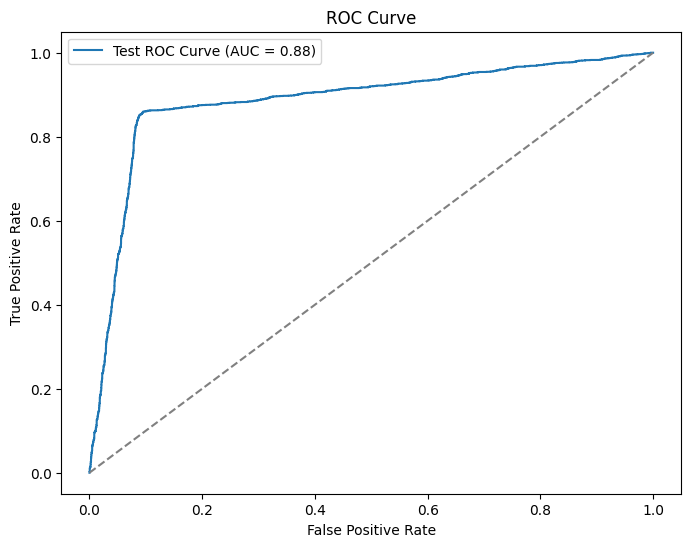

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for train and test data
y_test_proba = stacking_clf.predict_proba(X_test)[:, 1]



# Calculate ROC curve for test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)



# Calculate AUC for test data
auc_test = roc_auc_score(y_test, y_test_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


<h2 style="font-size: 20px; font-weight: bold;">Model Updates</h2>

<p style="margin-bottom: 20px;">In this section, we provide updates on the model building process and performance evaluation. The updates include:</p>

<h3 style="font-size: 18px; font-weight: bold;">Deep Learning Models Used</h3>

<p style="margin-bottom: 20px;">We explore the following deep learning models:</p>

<ul style="margin-bottom: 20px;">
    <li><strong>Convolutional Neural Network (CNN):</strong> Efficient handling of 1D data, hierarchical feature learning.</li>
    <li><strong>Gated Recurrent Unit (GRU):</strong> Handling long-term dependencies, efficient memory usage.</li>
    <li><strong>Long Short-Term Memory (LSTM):</strong> Memory cell, capturing temporal patterns.</li>
</ul>

<h3 style="font-size: 18px; font-weight: bold;">Hyperparameter Tuning</h3>

<p style="margin-bottom: 20px;">We perform hyperparameter tuning for CNN and LSTM models, including parameters such as filters, kernel size, dropout rate, learning rate, batch size, and epochs.</p>

<h3 style="font-size: 18px; font-weight: bold;">Best Model Selection</h3>

<p style="margin-bottom: 20px;">We compare the performance of CNN, GRU, and LSTM models and select the best performing model based on metrics such as accuracy, precision, and area under the curve (AUC) score.</p>

<h3 style="font-size: 18px; font-weight: bold;">Comparative Analysis</h3>

<p style="margin-bottom: 20px;">We compare the performance of the selected deep learning model with previously trained ensemble and traditional machine learning models, such as Random Forest and KNN.</p>

<h3 style="font-size: 18px; font-weight: bold;">Future Directions</h3>

<p style="margin-bottom: 20px;">Based on the model updates, our future directions include:</p>

<ul style="margin-bottom: 20px;">
    <li>Exploring additional deep learning architectures and techniques, such as ensemble learning and transfer learning.</li>
    <li>Further optimization of the chosen model for improved performance and efficiency.</li>
    <li>Testing the model on additional datasets to assess generalization and adaptability.</li>
</ul>


# **Convolutional Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout



model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Conv1D(256, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision()])

# Reshape your features if needed (add a dimension for the channel)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/10
795/795 [==============================] - 17s 19ms/step - loss: 0.4496 - accuracy: 0.8365 - precision: 0.8088 - val_loss: 0.3975 - val_accuracy: 0.8666 - val_precision: 0.8424
Epoch 2/10
795/795 [==============================] - 13s 16ms/step - loss: 0.3966 - accuracy: 0.8686 - precision: 0.8428 - val_loss: 0.3894 - val_accuracy: 0.8658 - val_precision: 0.8544
Epoch 3/10
795/795 [==============================] - 13s 16ms/step - loss: 0.3861 - accuracy: 0.8750 - precision: 0.8459 - val_loss: 0.3860 - val_accuracy: 0.8699 - val_precision: 0.8516
Epoch 4/10
795/795 [==============================] - 12s 16ms/step - loss: 0.3805 - accuracy: 0.8771 - precision: 0.8479 - val_loss: 0.3725 - val_accuracy: 0.8781 - val_precision: 0.8450
Epoch 5/10
795/795 [==============================] - 15s 19ms/step - loss: 0.3746 - accuracy: 0.8787 - precision: 0.8484 - val_loss: 0.3642 - val_accuracy: 0.8806 - val_precision: 0.8437
Epoch 6/10
795/795 [==============================] - 12s 15

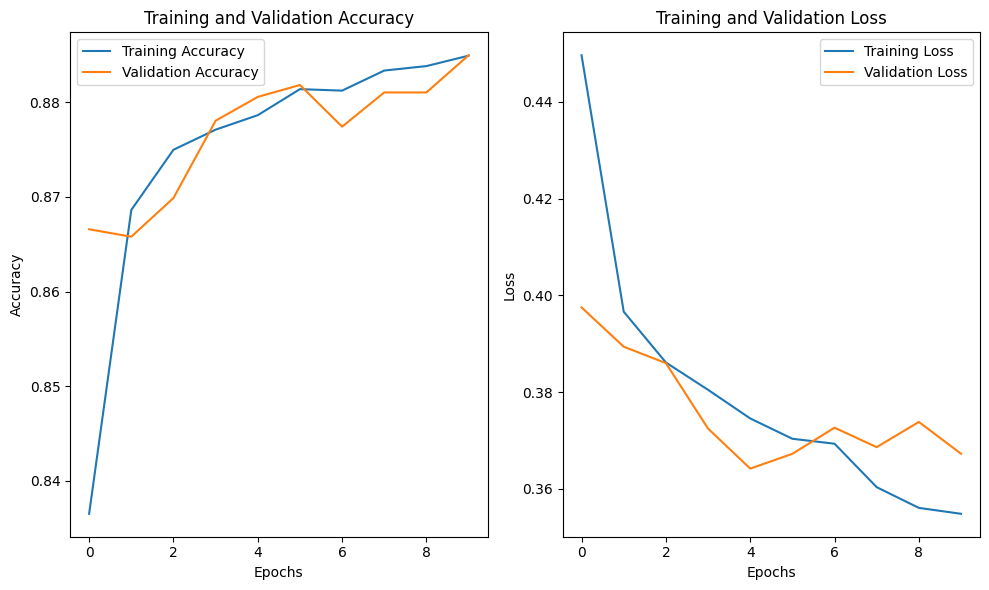

In [ ]:
import matplotlib.pyplot as plt

# Access the history object
history = model.history.history

# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot training and validation accuracy
axs[0].plot(history['accuracy'], label='Training Accuracy')
axs[0].plot(history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history['loss'], label='Training Loss')
axs[1].plot(history['val_loss'], label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Evaluate the model on training data
train_loss, train_accuracy, train_precision = model.evaluate(X_train_reshaped, y_train, verbose=0)

# Evaluate the model on test data
test_loss, test_accuracy, test_precision = model.evaluate(X_test_reshaped, y_test, verbose=0)

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)


Training Accuracy: 0.8882114887237549
Training Precision: 0.849454402923584
Test Accuracy: 0.8849905729293823
Test Precision: 0.8469645977020264


199/199 [==============================] - 2s 6ms/step


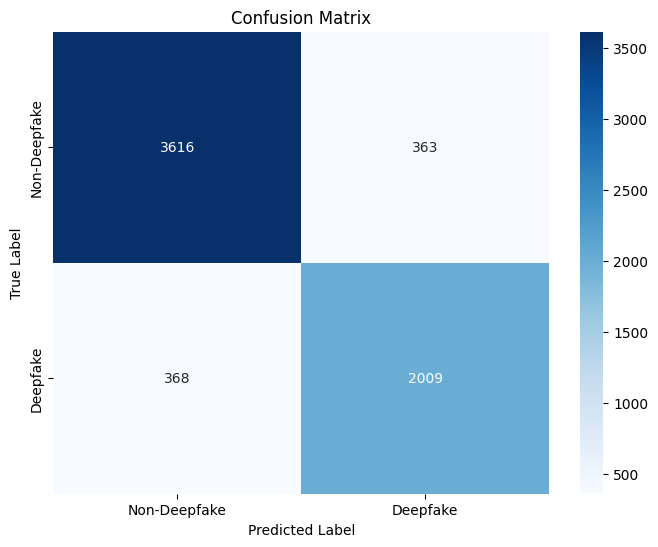

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred = model.predict(X_test_reshaped)

# Since your model outputs probabilities, you may want to convert them to binary predictions
# For example, you can round probabilities to the nearest integer (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Deepfake', 'Deepfake'], yticklabels=['Non-Deepfake', 'Deepfake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

199/199 [==============================] - 1s 7ms/step


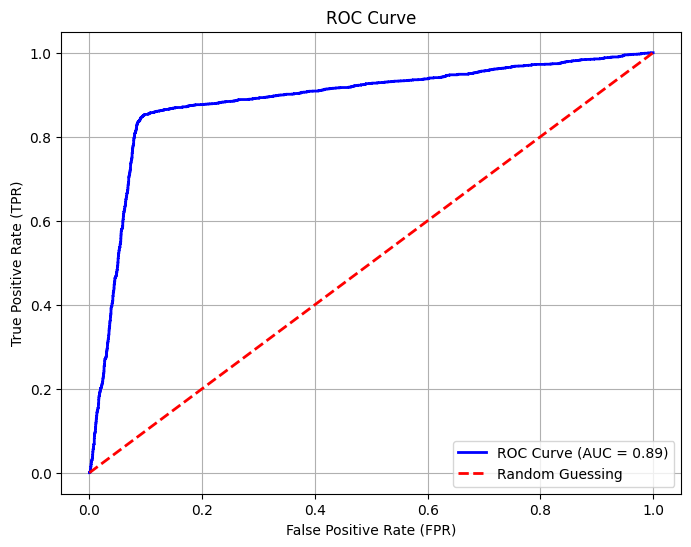

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_probs = model.predict(X_test_reshaped)

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**CNN Hyperparameter tuning**


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


# Define the CNN model
model = Sequential([
    Conv1D(64, 5, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(2),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(256, 5, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision()])

# Reshape your features if needed (add a dimension for the channel)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/20
795/795 [==============================] - 21s 24ms/step - loss: 0.4155 - accuracy: 0.8518 - precision_3: 0.8240 - val_loss: 0.3905 - val_accuracy: 0.8661 - val_precision_3: 0.8552
Epoch 2/20
795/795 [==============================] - 19s 23ms/step - loss: 0.3765 - accuracy: 0.8765 - precision_3: 0.8472 - val_loss: 0.3638 - val_accuracy: 0.8806 - val_precision_3: 0.8514
Epoch 3/20
795/795 [==============================] - 19s 24ms/step - loss: 0.3660 - accuracy: 0.8800 - precision_3: 0.8487 - val_loss: 0.3701 - val_accuracy: 0.8795 - val_precision_3: 0.8513
Epoch 4/20
795/795 [==============================] - 19s 24ms/step - loss: 0.3609 - accuracy: 0.8814 - precision_3: 0.8501 - val_loss: 0.3624 - val_accuracy: 0.8826 - val_precision_3: 0.8414
Epoch 5/20
795/795 [==============================] - 19s 23ms/step - loss: 0.3575 - accuracy: 0.8840 - precision_3: 0.8534 - val_loss: 0.3643 - val_accuracy: 0.8837 - val_precision_3: 0.8476
Epoch 6/20
795/795 [====================

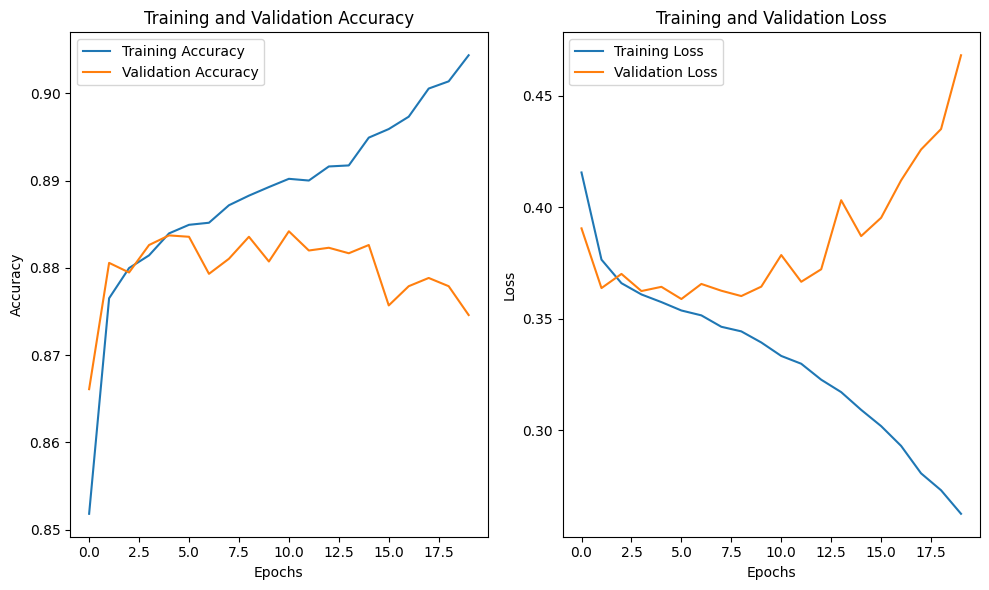

In [ ]:
import matplotlib.pyplot as plt

# Access the history object
history = model.history.history

# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot training and validation accuracy
axs[0].plot(history['accuracy'], label='Training Accuracy')
axs[0].plot(history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history['loss'], label='Training Loss')
axs[1].plot(history['val_loss'], label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Evaluate the model on training data
train_loss, train_accuracy, train_precision = model.evaluate(X_train_reshaped, y_train, verbose=0)

# Evaluate the model on test data
test_loss, test_accuracy, test_precision = model.evaluate(X_test_reshaped, y_test, verbose=0)

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)


Training Accuracy: 0.9125595092773438
Training Precision: 0.8732671141624451
Test Accuracy: 0.8746066689491272
Test Precision: 0.8313758373260498


# **Long Short Term Memory (LSTM)**

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Define the RNN model
lstm_model = Sequential([
    LSTM(128, input_shape=(40,1), return_sequences=True),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision()])

# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
795/795 [==============================] - 16s 14ms/step - loss: 0.5433 - accuracy: 0.7450 - precision_1: 0.7216 - val_loss: 0.4725 - val_accuracy: 0.8070 - val_precision_1: 0.7380
Epoch 2/20
795/795 [==============================] - 10s 13ms/step - loss: 0.4507 - accuracy: 0.8200 - precision_1: 0.7792 - val_loss: 0.4515 - val_accuracy: 0.8137 - val_precision_1: 0.7184
Epoch 3/20
795/795 [==============================] - 10s 13ms/step - loss: 0.4134 - accuracy: 0.8457 - precision_1: 0.8094 - val_loss: 0.3999 - val_accuracy: 0.8551 - val_precision_1: 0.8236
Epoch 4/20
795/795 [==============================] - 10s 12ms/step - loss: 0.3962 - accuracy: 0.8579 - precision_1: 0.8214 - val_loss: 0.4058 - val_accuracy: 0.8551 - val_precision_1: 0.8444
Epoch 5/20
795/795 [==============================] - 10s 13ms/step - loss: 0.3841 - accuracy: 0.8650 - precision_1: 0.8277 - val_loss: 0.3738 - val_accuracy: 0.8721 - val_precision_1: 0.8345
Epoch 6/20
795/795 [====================

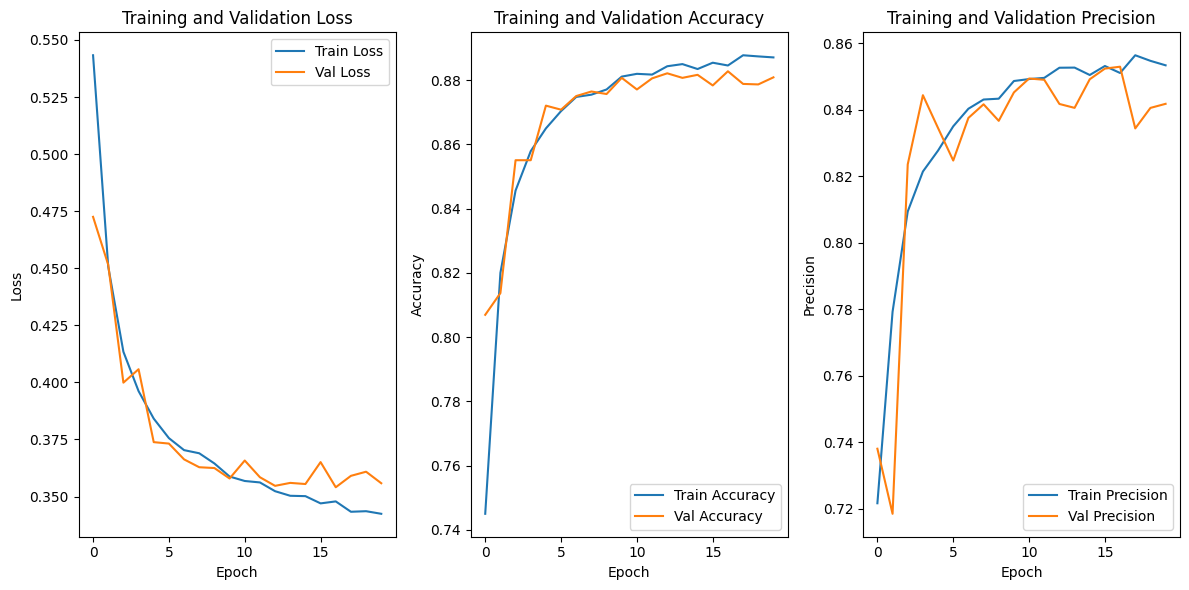

In [ ]:
# Extract loss, accuracy, and precision values from the history
train_loss = lstm_model.history.history['loss']
val_loss = lstm_model.history.history['val_loss']
train_accuracy = lstm_model.history.history['accuracy']
val_accuracy = lstm_model.history.history['val_accuracy']
train_precision = lstm_model.history.history['precision_1']
val_precision = lstm_model.history.history['val_precision_1']

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 3, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation precision
plt.subplot(1, 3, 3)
plt.plot(train_precision, label='Train Precision')
plt.plot(val_precision, label='Val Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on training data
train_loss, train_accuracy, train_precision = lstm_model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)

# Evaluate the model on test data
test_loss, test_accuracy, test_precision = lstm_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)


Training Accuracy: 0.8924595713615417
Training Precision: 0.8578290343284607
Test Accuracy: 0.880899965763092
Test Precision: 0.8417721390724182


199/199 [==============================] - 3s 7ms/step


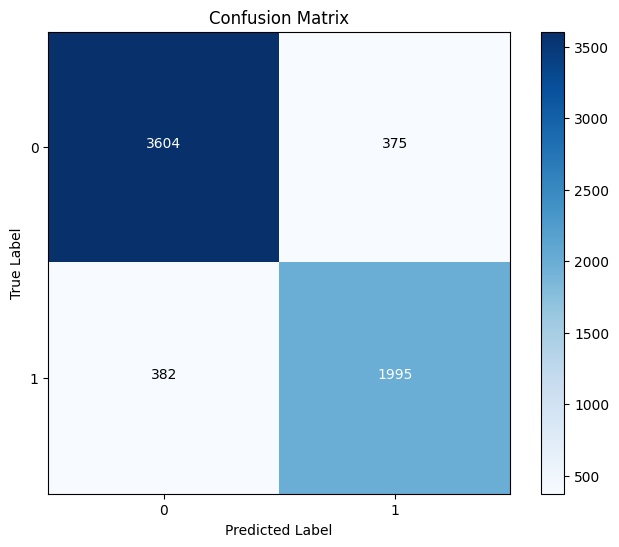

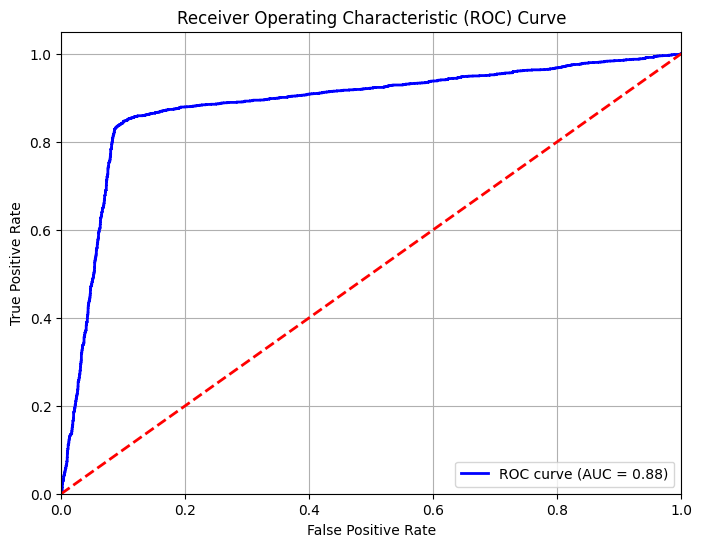

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred_proba = lstm_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.show()

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Hyperparameter tuning : LSTM

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Define the RNN model
lstm_model = Sequential([
    LSTM(128, input_shape=(40,1), return_sequences=True),
    #LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision()])

# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
795/795 [==============================] - 15s 12ms/step - loss: 0.5319 - accuracy: 0.7545 - precision_2: 0.7229 - val_loss: 0.4776 - val_accuracy: 0.7947 - val_precision_2: 0.7916
Epoch 2/20
795/795 [==============================] - 7s 9ms/step - loss: 0.4427 - accuracy: 0.8272 - precision_2: 0.7910 - val_loss: 0.4374 - val_accuracy: 0.8188 - val_precision_2: 0.8291
Epoch 3/20
795/795 [==============================] - 8s 10ms/step - loss: 0.4093 - accuracy: 0.8501 - precision_2: 0.8148 - val_loss: 0.3797 - val_accuracy: 0.8644 - val_precision_2: 0.8278
Epoch 4/20
795/795 [==============================] - 7s 9ms/step - loss: 0.3857 - accuracy: 0.8668 - precision_2: 0.8304 - val_loss: 0.3702 - val_accuracy: 0.8713 - val_precision_2: 0.8249
Epoch 5/20
795/795 [==============================] - 8s 10ms/step - loss: 0.3769 - accuracy: 0.8720 - precision_2: 0.8382 - val_loss: 0.3611 - val_accuracy: 0.8809 - val_precision_2: 0.8470
Epoch 6/20
795/795 [==========================

In [ ]:
# Evaluate the model on training data
train_loss, train_accuracy, train_precision = lstm_model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)

# Evaluate the model on test data
test_loss, test_accuracy, test_precision = lstm_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)


Training Accuracy: 0.8918695449829102
Training Precision: 0.8587515950202942
Test Accuracy: 0.8821585774421692
Test Precision: 0.8417296409606934


# **Gated Recurrent Unit**

In [ ]:
from tensorflow.keras.layers import GRU

# Define the RNN model with GRU layers
gru_model = Sequential([
    GRU(128, input_shape=(40, 1), return_sequences=True),
    GRU(128, return_sequences=True),
    GRU(128),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])

# Train the model
gru_model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/25
398/398 [==============================] - 12s 16ms/step - loss: 0.5068 - accuracy: 0.7742 - precision_6: 0.7628 - val_loss: 0.4292 - val_accuracy: 0.8364 - val_precision_6: 0.7841
Epoch 2/25
398/398 [==============================] - 5s 14ms/step - loss: 0.4165 - accuracy: 0.8447 - precision_6: 0.8114 - val_loss: 0.4026 - val_accuracy: 0.8524 - val_precision_6: 0.8333
Epoch 3/25
398/398 [==============================] - 5s 11ms/step - loss: 0.4034 - accuracy: 0.8551 - precision_6: 0.8224 - val_loss: 0.3976 - val_accuracy: 0.8527 - val_precision_6: 0.8159
Epoch 4/25
398/398 [==============================] - 5s 13ms/step - loss: 0.3907 - accuracy: 0.8643 - precision_6: 0.8304 - val_loss: 0.3825 - val_accuracy: 0.8661 - val_precision_6: 0.8230
Epoch 5/25
398/398 [==============================] - 5s 13ms/step - loss: 0.3794 - accuracy: 0.8676 - precision_6: 0.8323 - val_loss: 0.3814 - val_accuracy: 0.8660 - val_precision_6: 0.8314
Epoch 6/25
398/398 [========================

In [ ]:
# Evaluate the model on training data
train_loss, train_accuracy, train_precision = gru_model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on test data
test_loss, test_accuracy, test_precision = gru_model.evaluate(X_test, y_test, verbose=0)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)


Train Accuracy: 0.9084687232971191
Train Precision: 0.8743945956230164
Test Accuracy: 0.8686280846595764
Test Precision: 0.820182740688324


In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = gru_model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))

# Extract training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_precision = history.history['precision_1']
val_precision = history.history['val_precision_1']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation precision
plt.figure(figsize=(12, 6))
plt.plot(train_precision, label='Training Precision')
plt.plot(val_precision, label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()


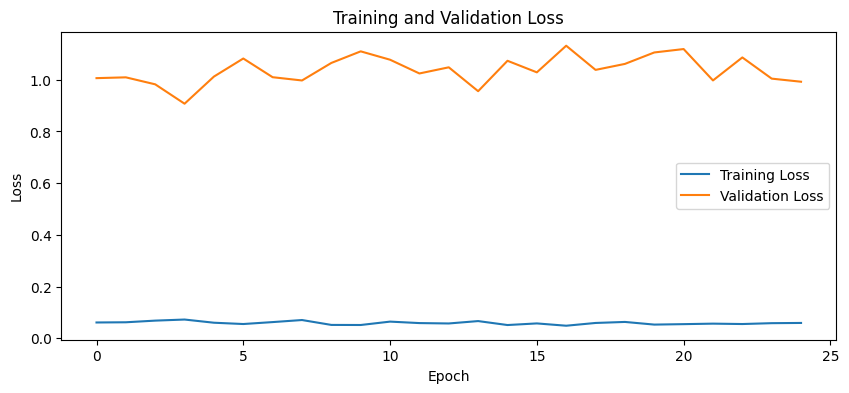

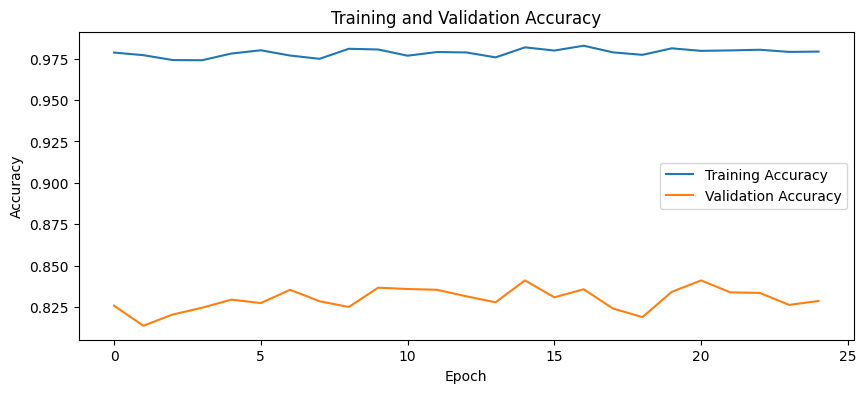

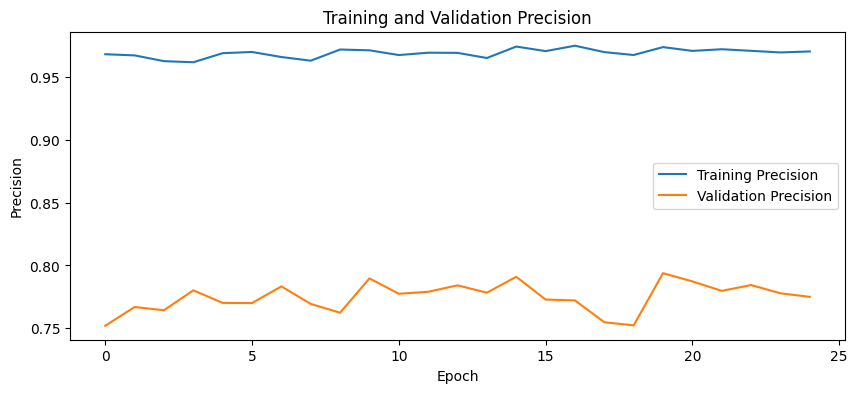

In [ ]:
# Extract training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_precision = history.history['precision_4']
val_precision = history.history['val_precision_4']

# Plot training and validation loss
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation precision
plt.figure(figsize=(10, 4))
plt.plot(train_precision, label='Training Precision')
plt.plot(val_precision, label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

<h2 style="font-size: 20px; font-weight: bold;"> <b>Conclusion</b></h2>  
<br>
   
   
   
<li> <p style="margin-bottom: 20px;">In this project, we addressed the critical issue of detecting deepfake audio, which poses significant challenges in various domains, including communication, media, and security. Through thorough exploration and analysis, we have made significant progress in developing robust and efficient methods for accurate detection of deepfake voices.</p></li>

<li> <p style="margin-bottom: 20px;">Our research journey began with a comprehensive literature search, where we reviewed existing techniques and identified gaps in the field. We then proceeded to collect and analyze a high-quality dataset from Fraunhofer AISEC, which provided valuable insights and enhanced the credibility of our research.</p>

<li><p style="margin-bottom: 20px;">The exploratory data analysis (EDA) phase helped us gain deeper insights into the dataset, allowing us to preprocess the data effectively and extract relevant features for model building. We explored various machine learning and deep learning algorithms, evaluating their performance and selecting the most suitable model for our task.</p>

<li><p style="margin-bottom: 20px;">Through model updates and performance evaluations, we demonstrated the effectiveness of deep learning models, particularly LSTM, in detecting deepfake voices with high accuracy and precision. Our findings highlight the importance of feature selection, preprocessing techniques, and model optimization in achieving robust detection capabilities.</p>

<li><p style="margin-bottom: 20px;">After careful evaluation, we determined that the Long Short-Term Memory (LSTM) model outperformed other models in terms of accuracy, precision, and overall performance. This model showed promising results in detecting deepfake audio and is recommended for deployment in real-world applications.</p>

<li><p style="margin-bottom: 20px;">Looking ahead, our project opens up avenues for further research and development in the field of deepfake audio detection. Future endeavors may focus on exploring advanced deep learning architectures, addressing class imbalance issues, and optimizing models for real-time detection in streaming content.</p>

<li><p style="margin-bottom: 20px;">In conclusion, our project contributes to the ongoing efforts in combating the spread of deepfake audio, safeguarding trust, security, and integrity in digital communication and media. By deploying effective detection systems, we can mitigate the risks associated with deepfake technology and uphold the authenticity of audio interactions in our increasingly digitized world.</p>
